In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}

number_of_top_domains = 5
number_of_domains_per_party = 3

start_end_date = [['01/1/2020','01/31/2020'],
                  ['02/1/2020', '02/29/2020'],
                  ['03/1/2020', '03/31/2020'],
                  ['04/1/2020', '04/30/2020'],
                  ['05/1/2020', '05/31/2020'],
                  ['06/1/2020', '06/30/2020'],
                  ['07/1/2020', '07/31/2020'],
                  ['08/1/2020', '08/31/2020'],
                  ['09/1/2020', '09/30/2020'],
                  ['10/1/2020', '10/31/2020'],
                  ['11/1/2020', '11/30/2020'],
                  ['12/1/2020', '12/31/2020'],]
                
heidenelkenrot = '#9C004B'
df_domains = pd.read_csv('all_tweets/domains_all_tweets.csv')
df = pd.DataFrame(df_domains)

def get_plot(data, dates):
    plt.figure(figsize=(25,8))
    sns.barplot(data.index, data.values, alpha=0.8, color=heidenelkenrot)
    plt.title(f'Top {number_of_top_domains} Domains ({dates[0]} - {dates[1]})', fontsize=18)
    plt.ylabel('Count', fontsize=17)
    plt.xlabel('Domains', fontsize=17)
    plt.tick_params(labelsize=17)

def get_plot_parties(data, dates):
    fig, ax = plt.subplots(figsize=(25,8))
    sns.barplot(x='domain', y='count', hue='party', data=data, palette=party_colors)
    plt.title(f'Top {number_of_domains_per_party} Domains ({dates[0]} - {dates[1]})')
    plt.ylabel('Count', fontsize=17)
    plt.xlabel('Domains', fontsize=17)
    plt.tick_params(labelsize=17)
    plt.show()

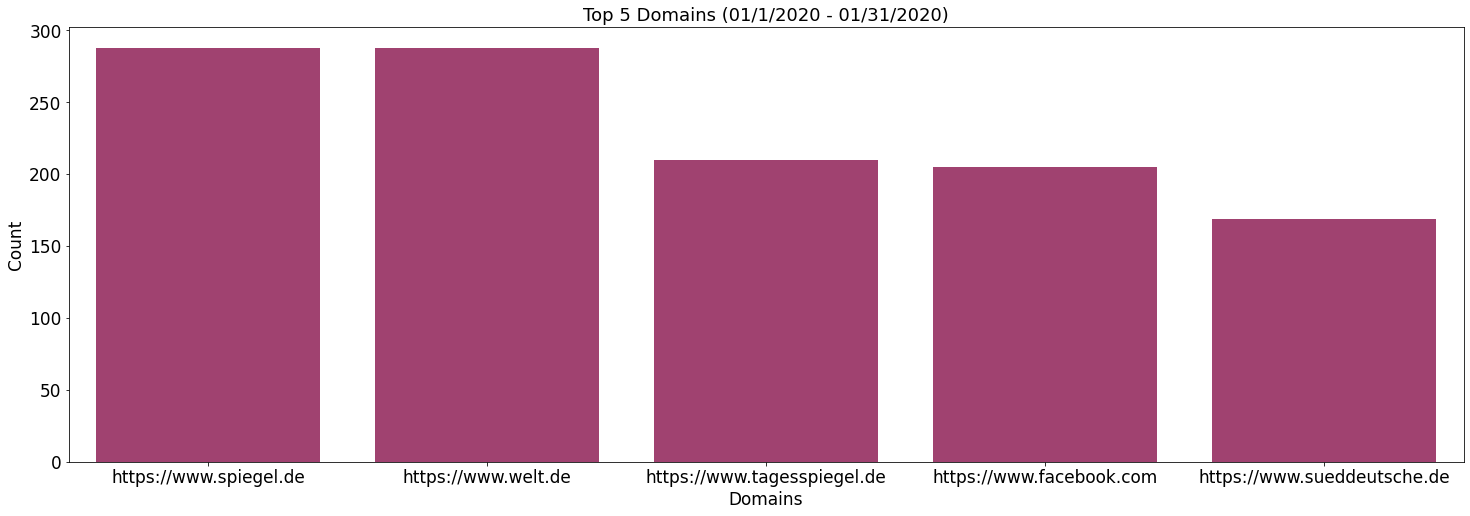

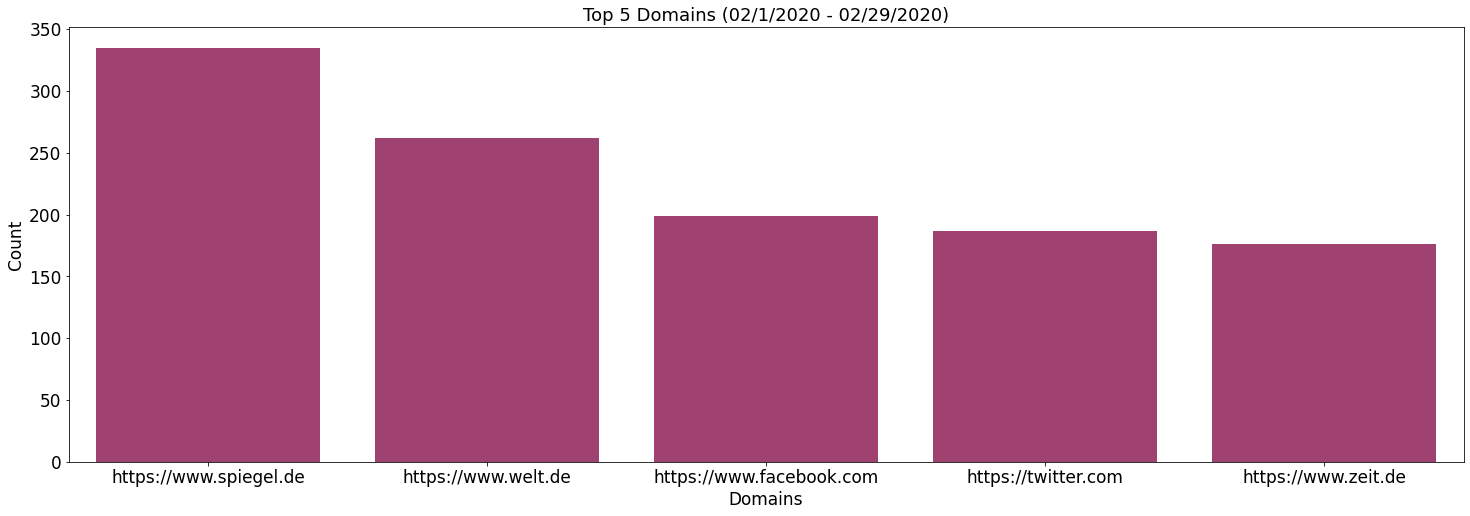

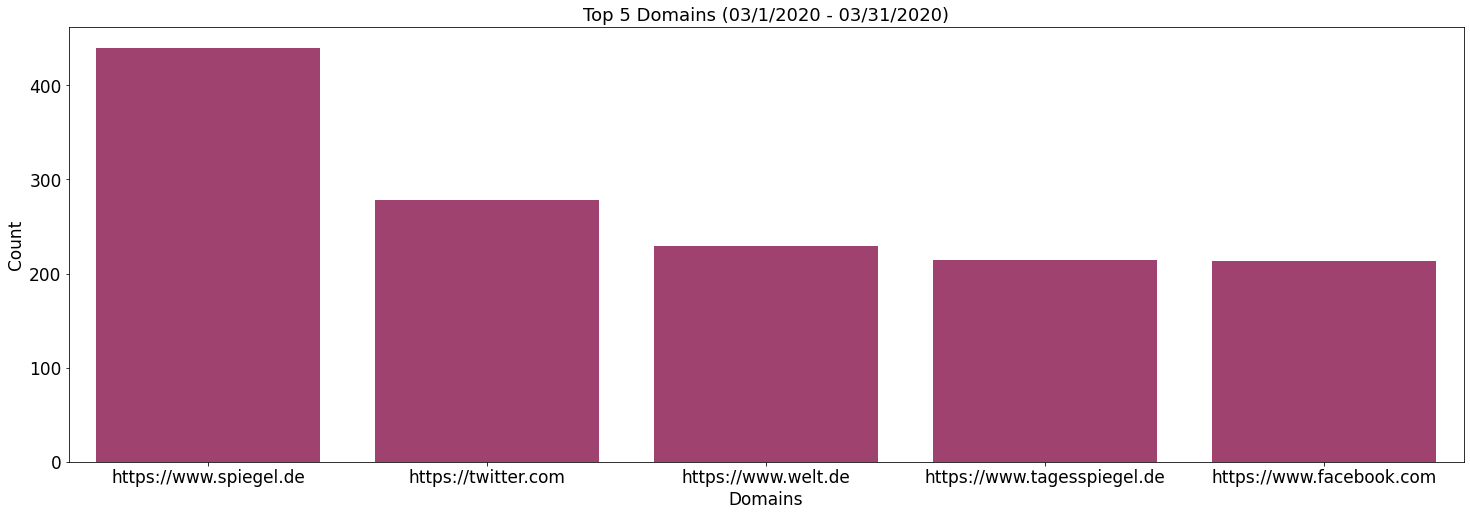

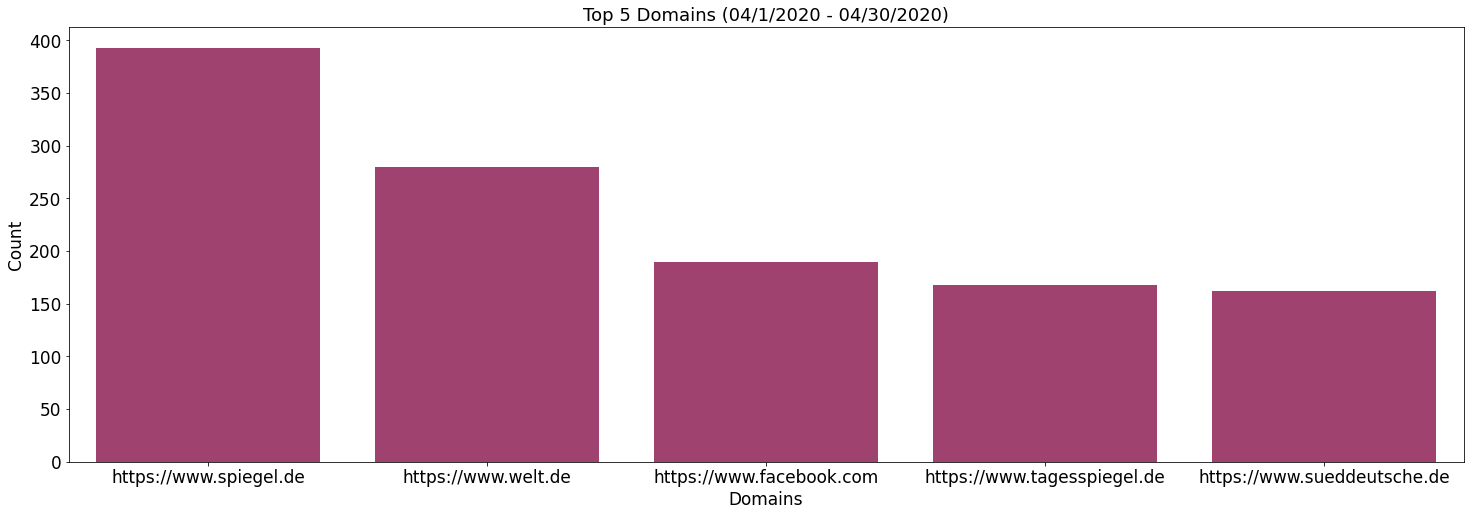

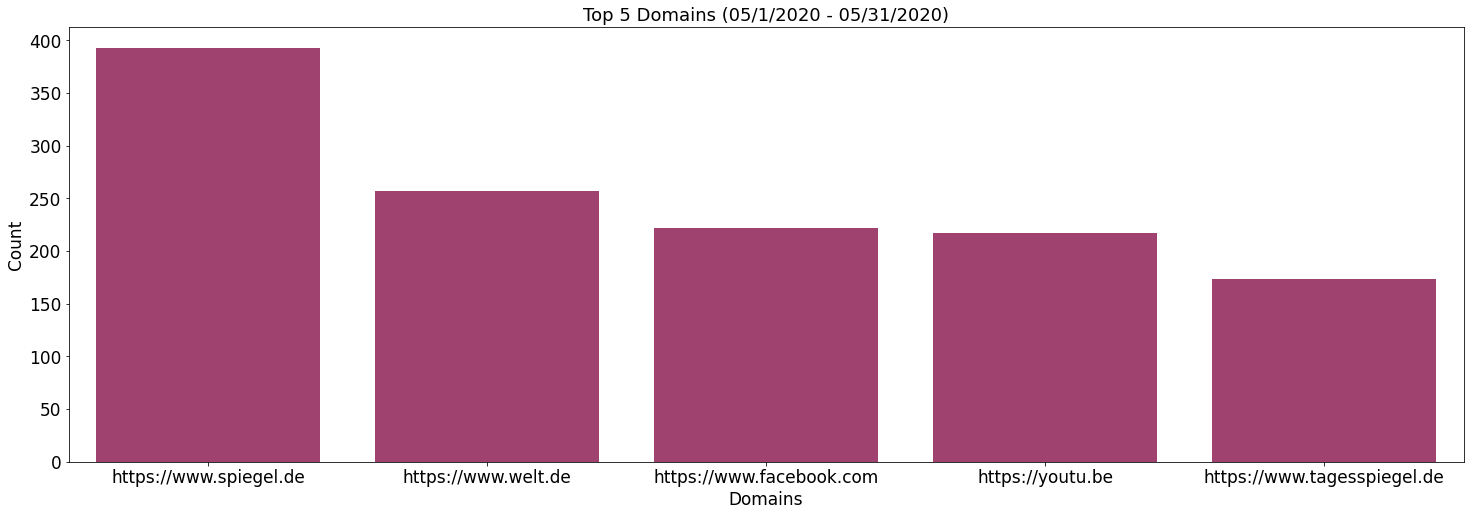

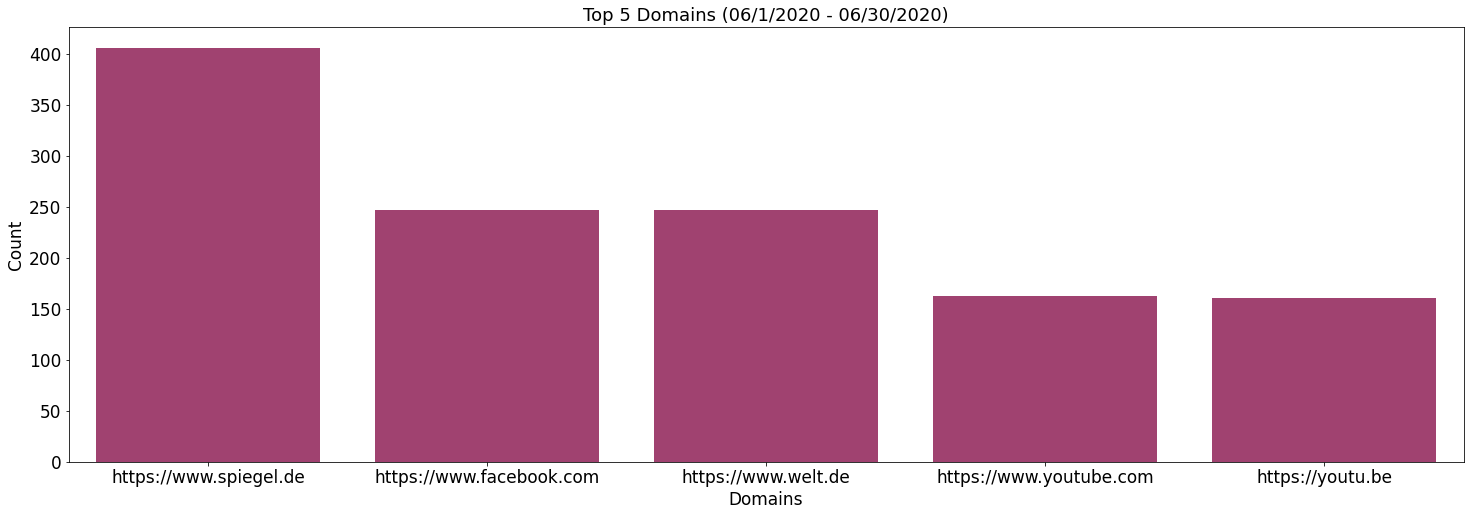

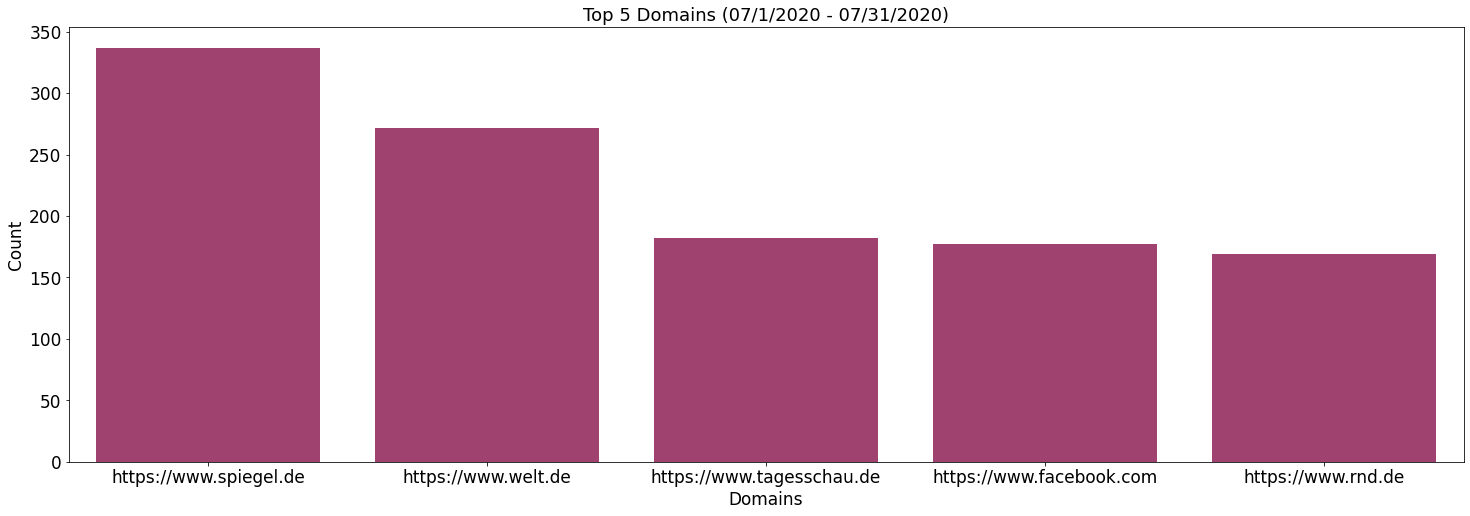

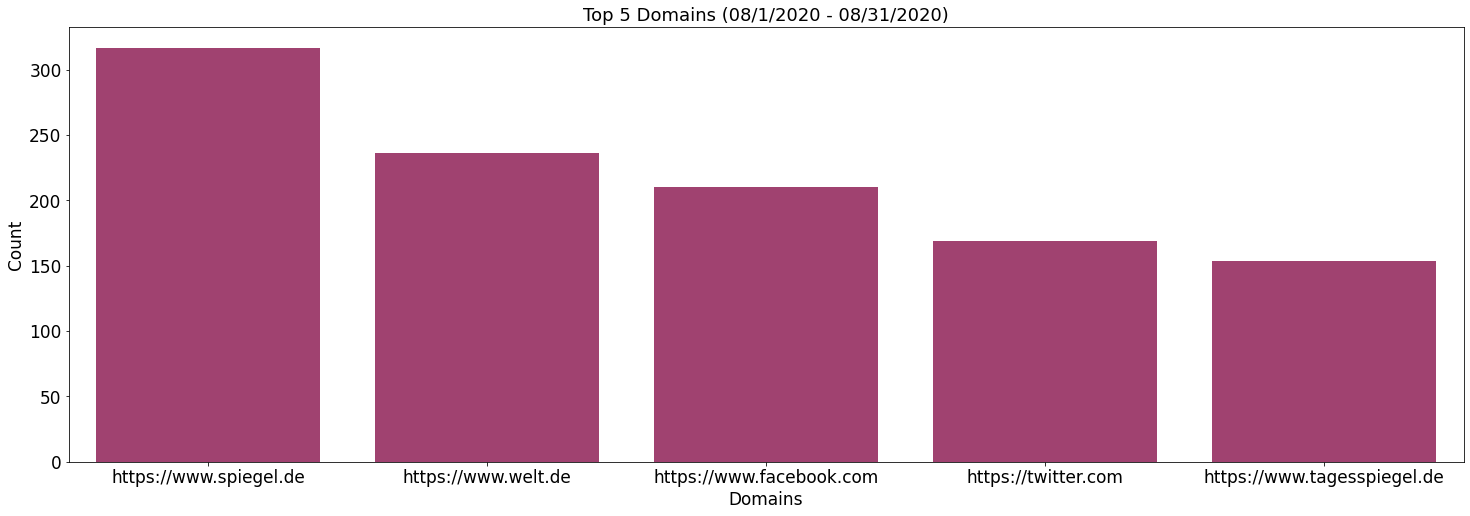

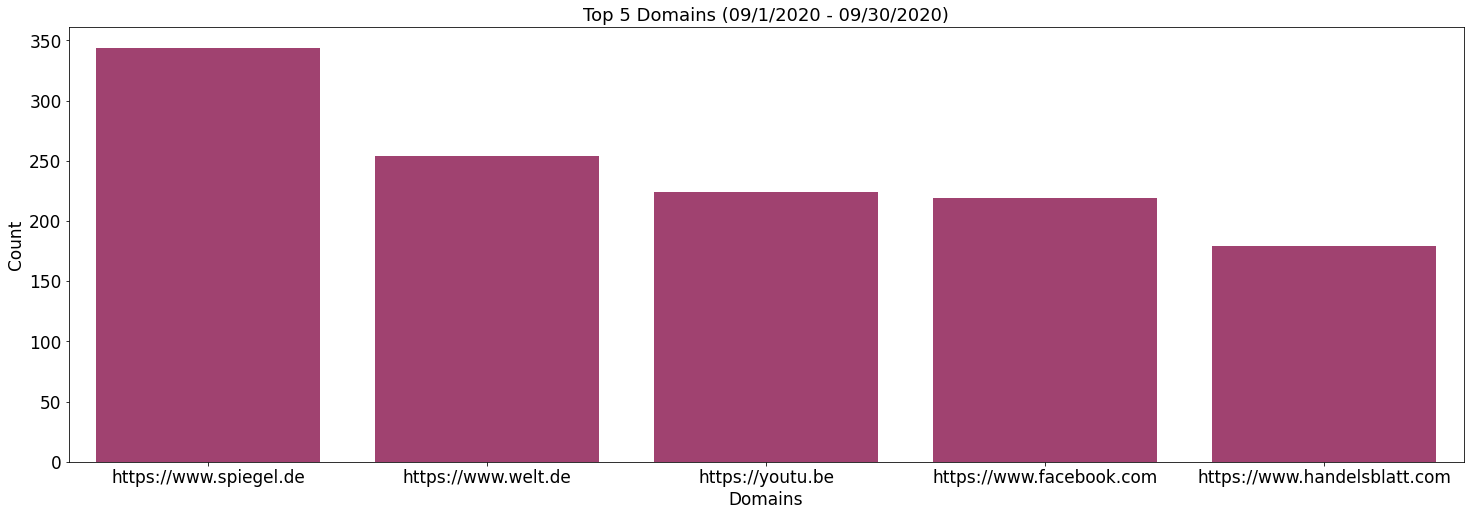

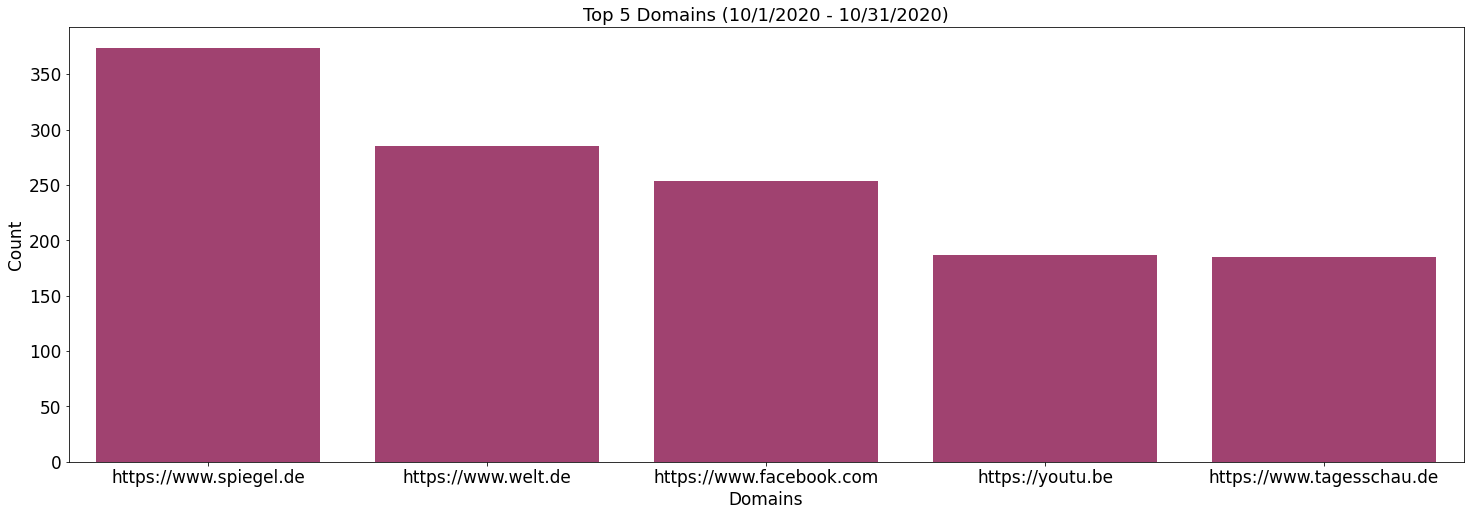

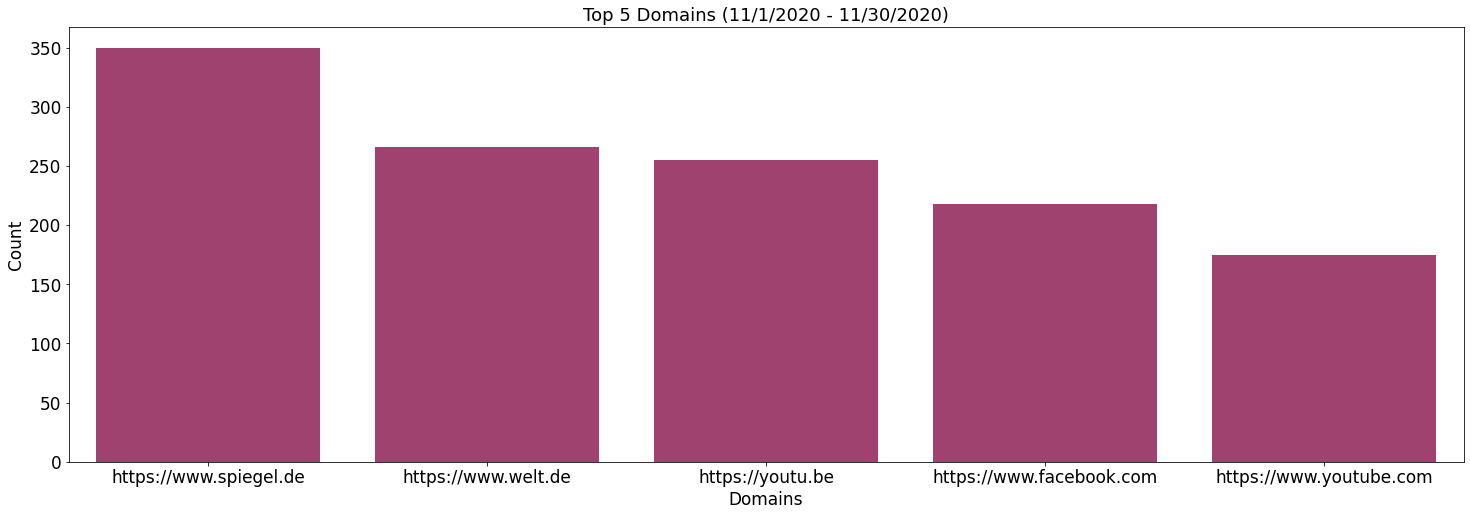

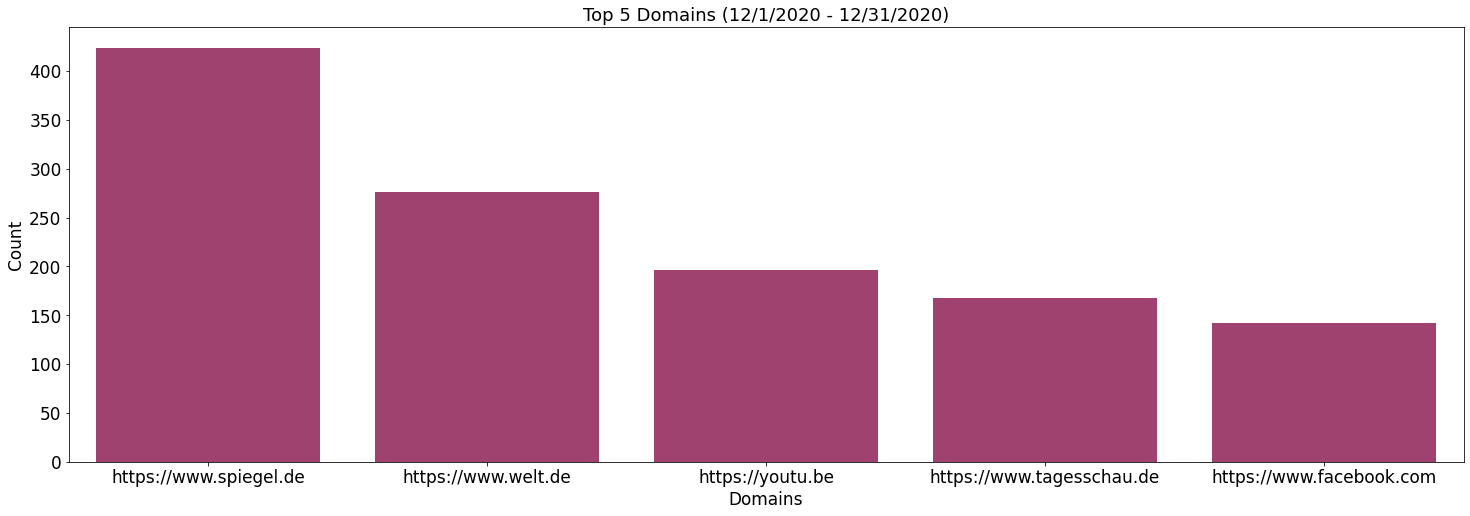

In [16]:
# Domains Top 5 throughout the year

df_copy = df.copy()
df_copy = df_copy.drop(['tweet_id', 'id', 'party', 'screen_name', 'name'], axis = 'columns')
df_copy['date'] = pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_domains_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc= True))]
    df_top_domains = (df_domains_per_month['domain'].value_counts(sort=True, ascending=False)).head(number_of_top_domains)
    plot = get_plot(df_top_domains, dates)
    plt.show()

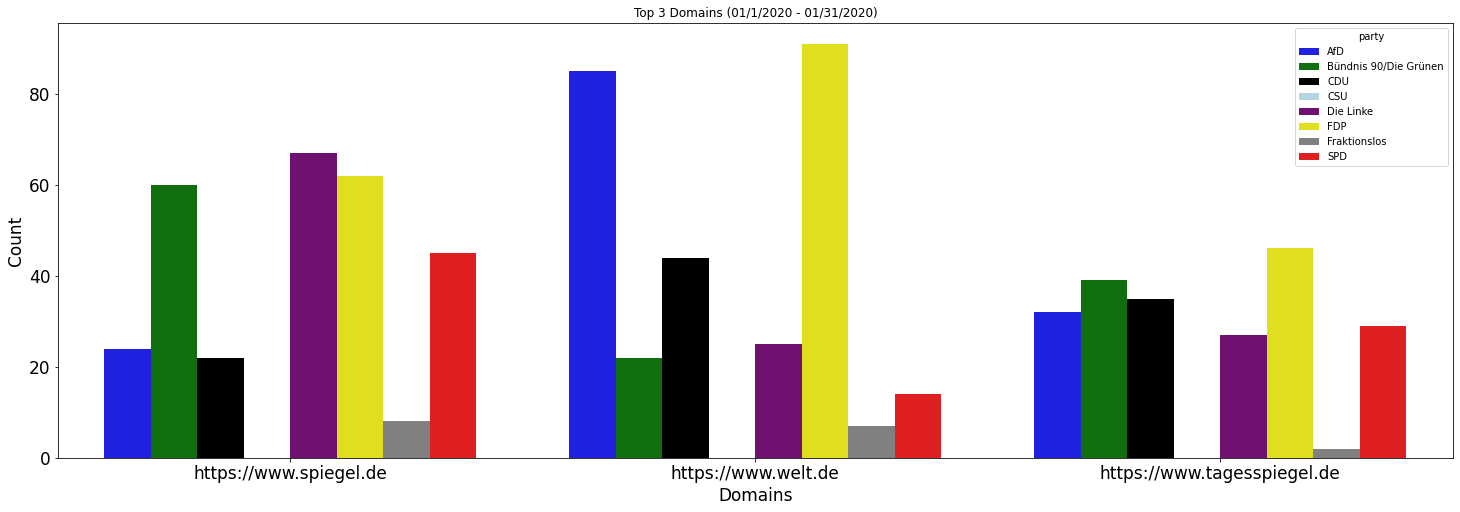

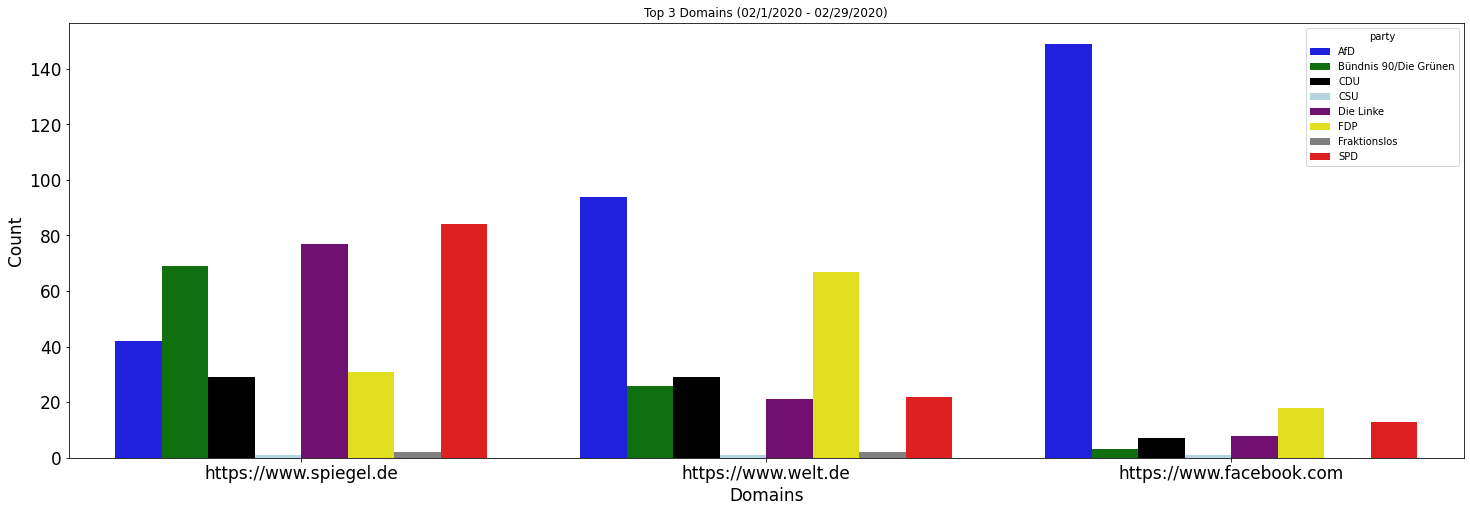

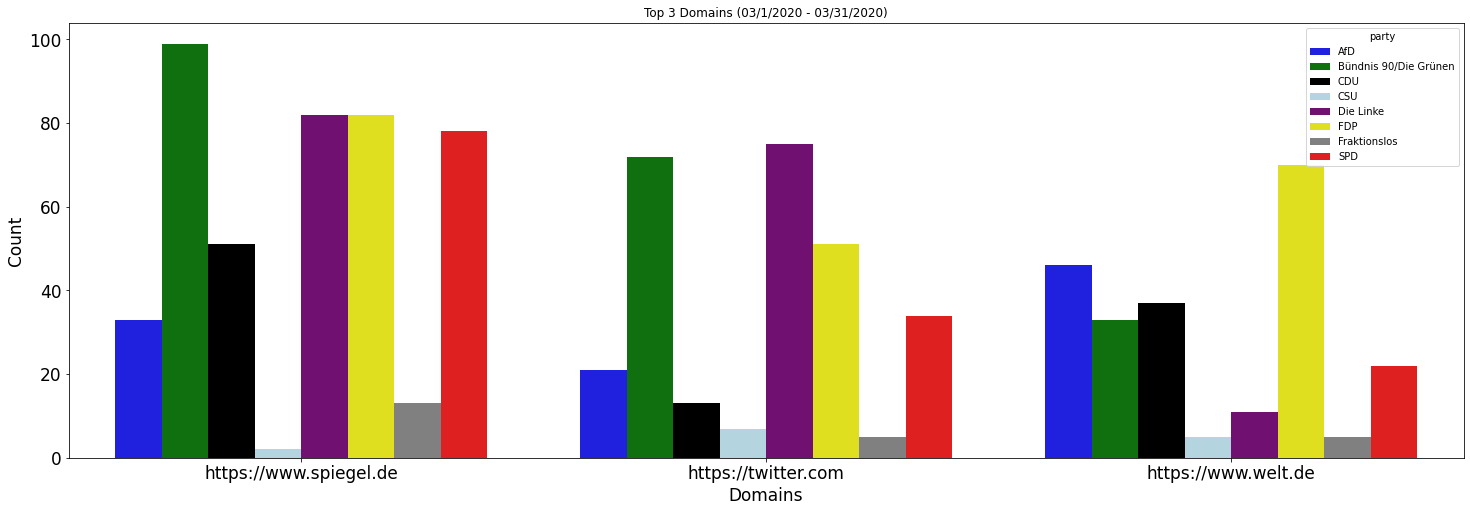

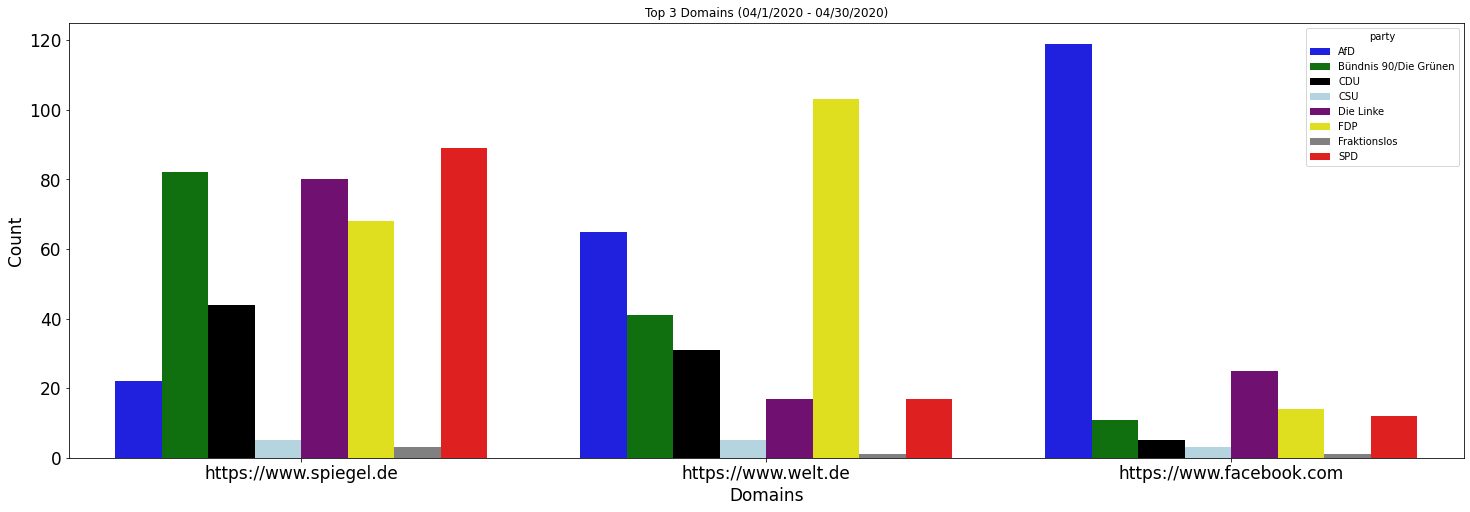

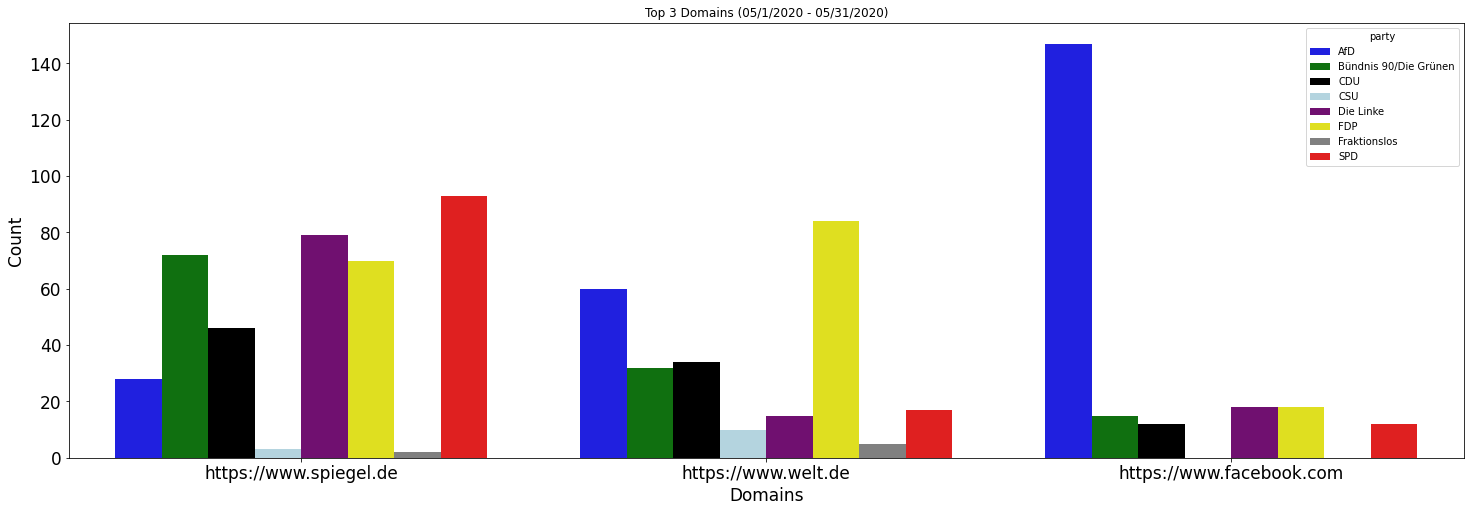

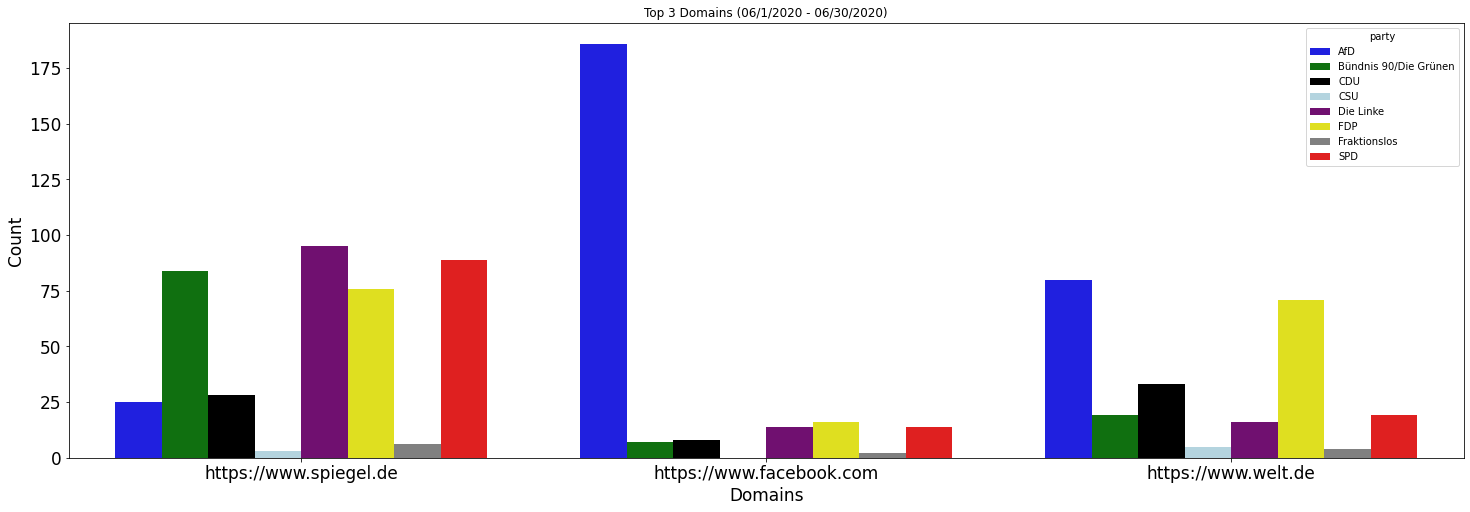

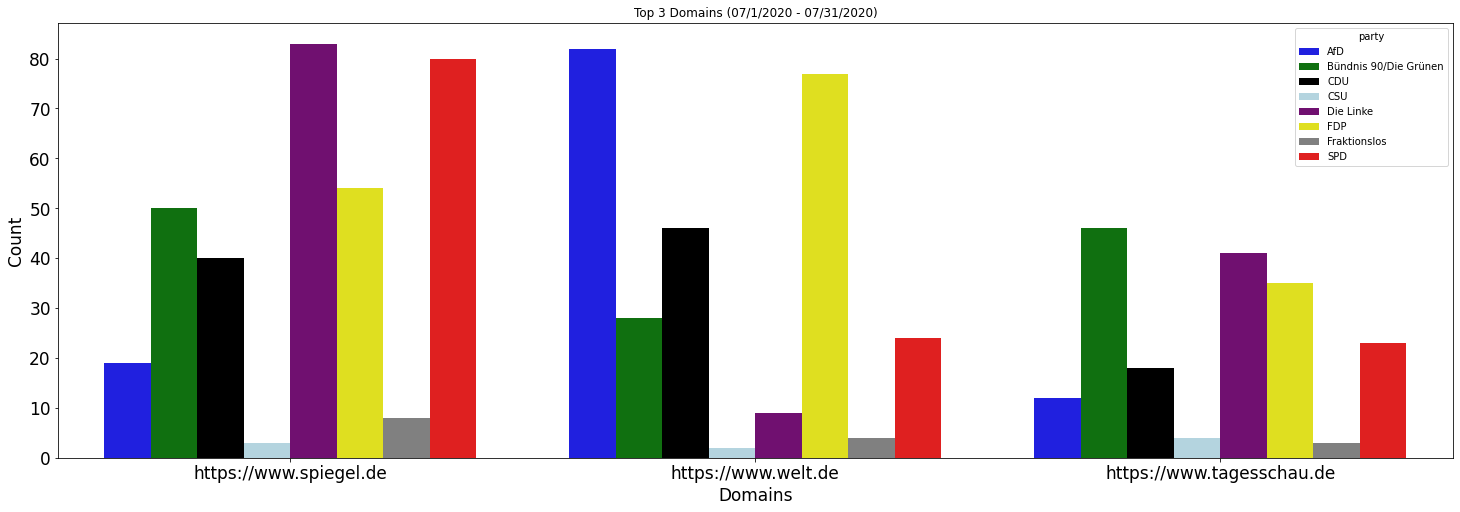

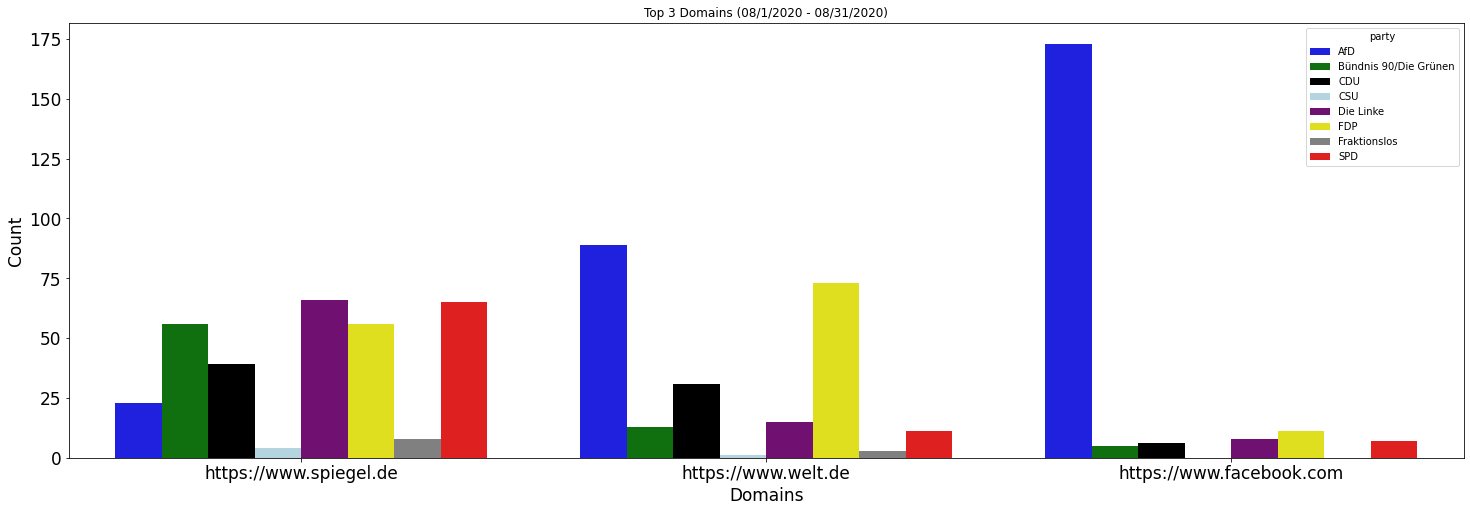

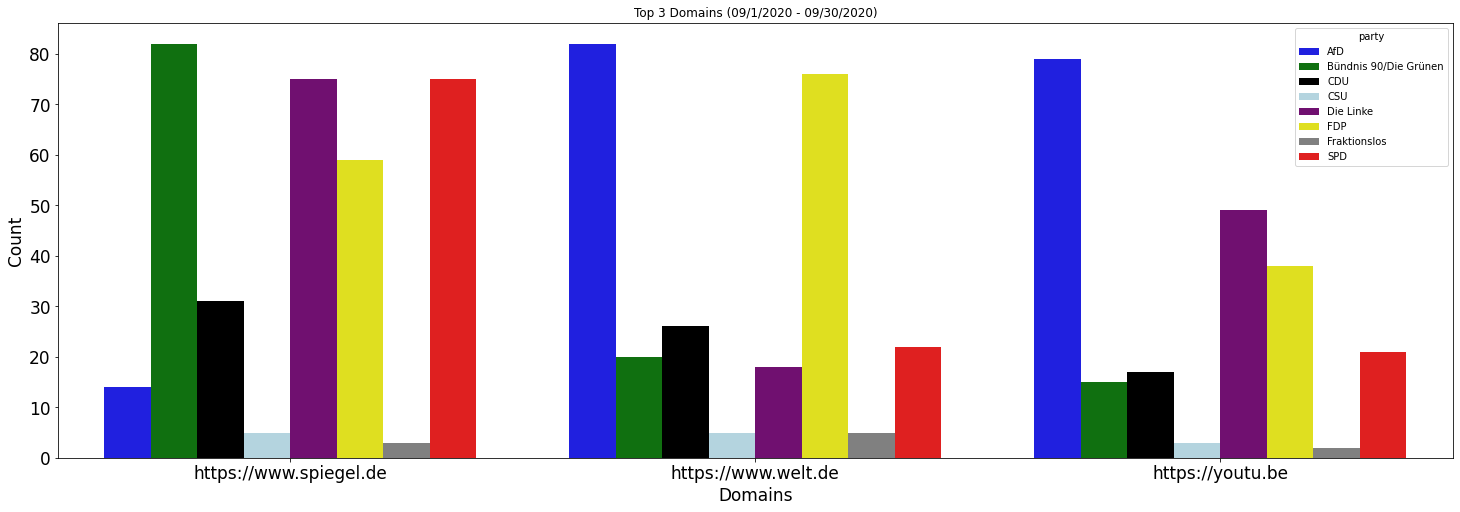

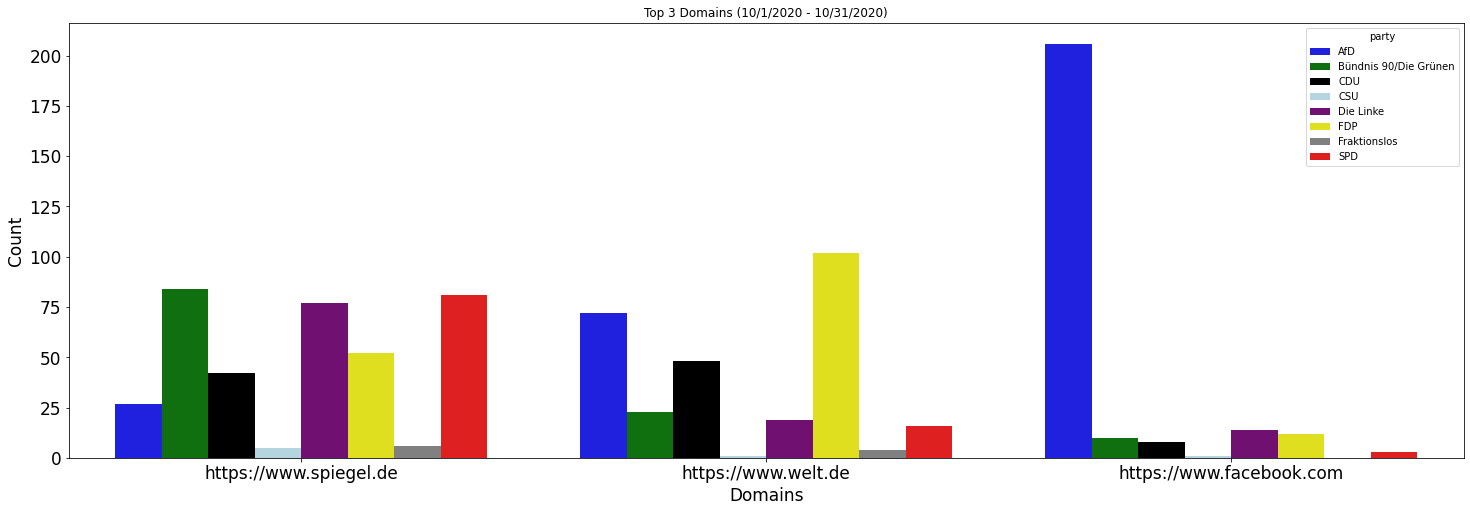

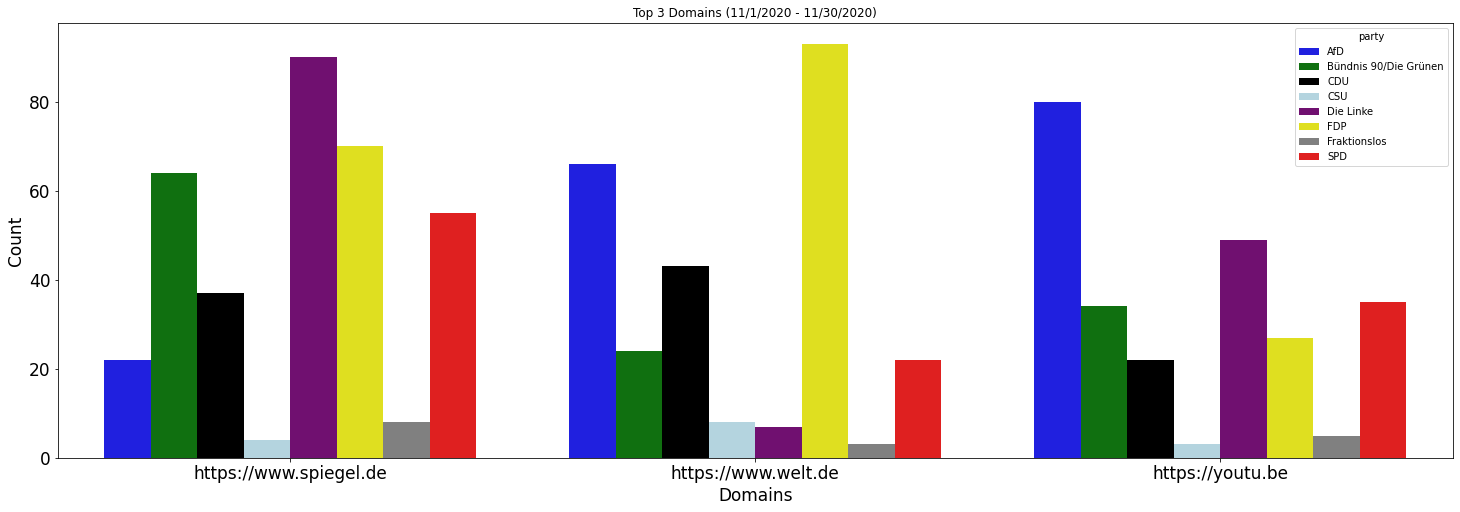

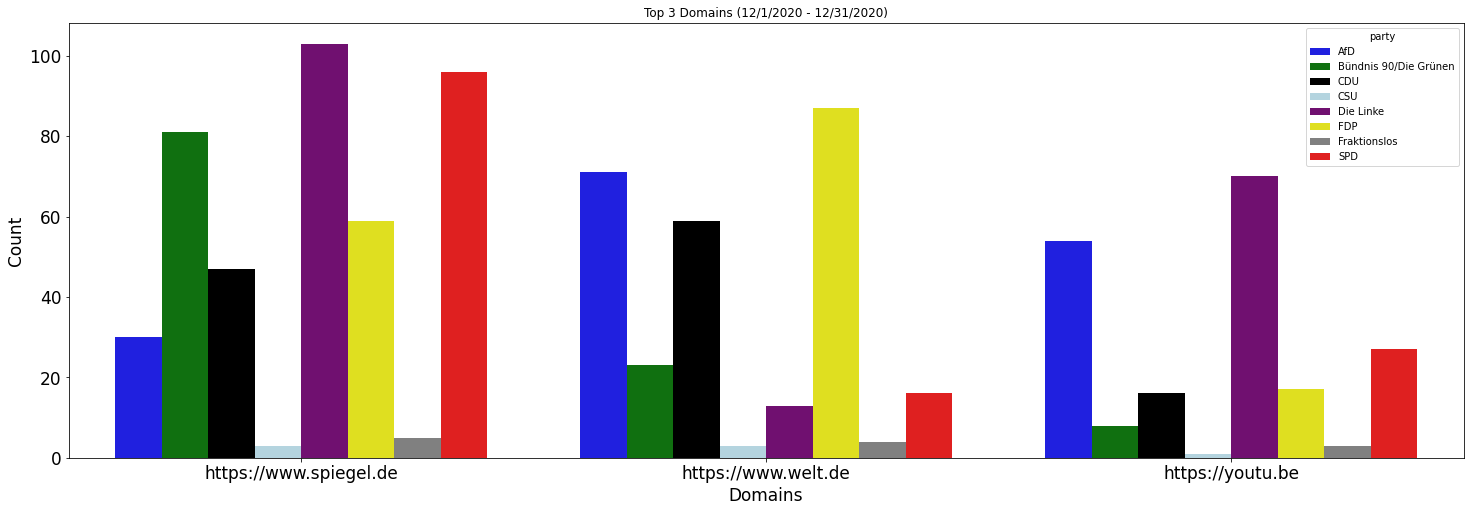

In [17]:
# Top Domains used by party throughout the year

df_copy = df.copy()
df_copy = df_copy.drop(['tweet_id', 'id', 'screen_name', 'name'], axis='columns')
df_copy['date']=pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_domains_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc=True))]
    df_relevant_columns = df_domains_per_month.drop('date', axis='columns')
    top_domains = ((df_relevant_columns['domain'].value_counts(sort=True, ascending=False)).head(number_of_domains_per_party)).index.to_list()
    df_relevant_columns = df_relevant_columns.groupby(['party'])['domain'].value_counts(sort=True, ascending=False).unstack().fillna(0)
    df_top_domains = df_relevant_columns.filter(items=top_domains)
    df_top_domains = df_top_domains.rename_axis(None, axis=1)
    data_top_domains = df_top_domains.reset_index().melt(id_vars=['party'], value_vars=top_domains, var_name='domain', value_name='count')
    plot = get_plot_parties(data_top_domains, dates)
    plt.show()

In [18]:
#Functions for Corona-Tweets
import json
TWEETS_SOURCE_FOLDER = '../filtered_data/covid_tweets/'

def get_politicians_list():
    with open('../../assets/all_politicians.json', 'r', encoding='utf-8') as infile:
        politicians_list = []
        f_content = json.load(infile)
        politicians_list = [p['screen_name'] + '.json' for p in f_content]
        return politicians_list
file_names = get_politicians_list()


def filter_rows_by_values(df, col, values, covid):
    return df[df[col].isin(values) == covid]

def get_all_covid_tweet_ids():
    ids = []
    for entry in file_names:
        f_path = os.path.join(TWEETS_SOURCE_FOLDER, entry)
        if os.path.isfile(f_path):
            with open(f_path, 'r', encoding='utf-8') as infile:
                f_content = json.load(infile)
                if f_content != []:
                    for tweet in f_content:
                        ids.append(tweet.get('raw_data').get('id'))
    return ids


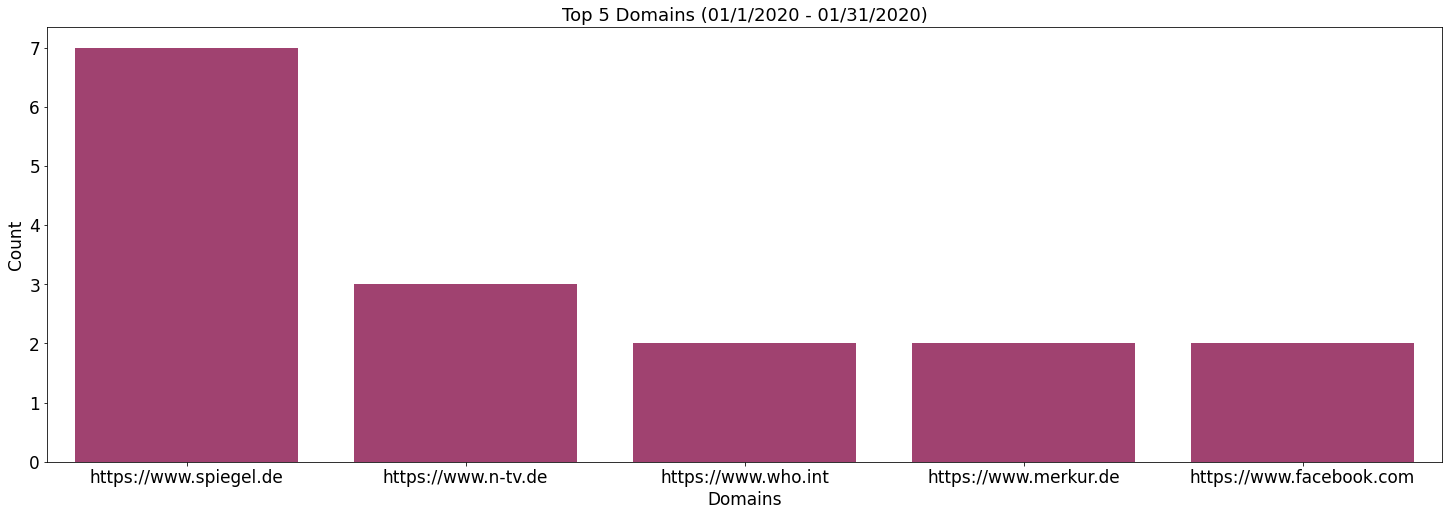

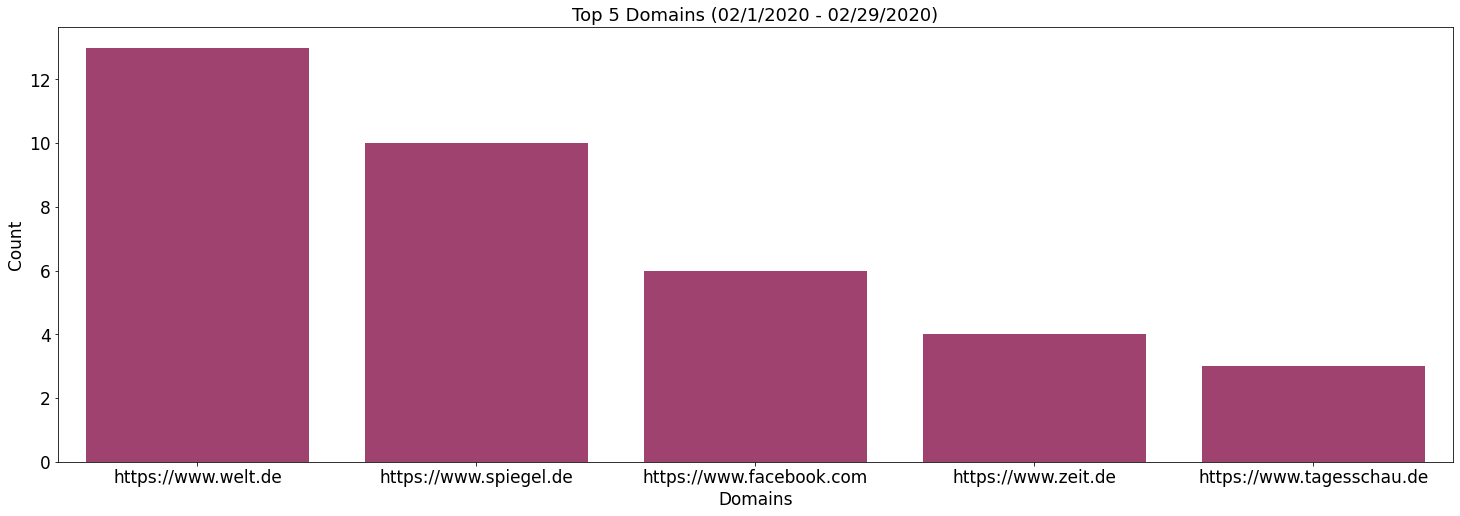

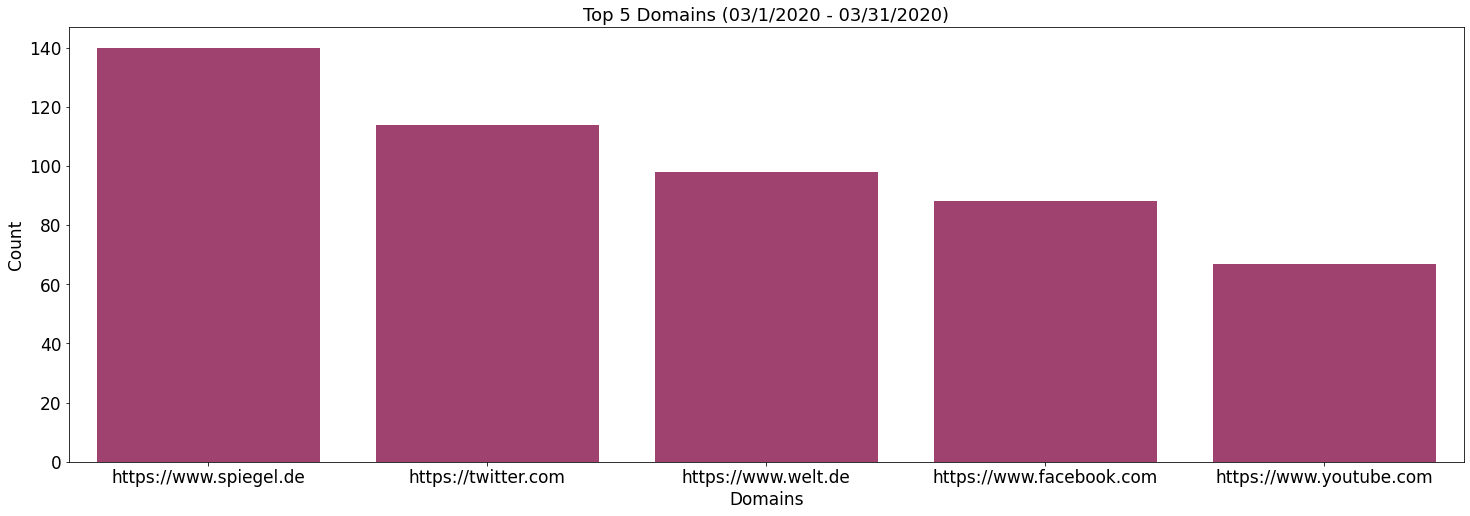

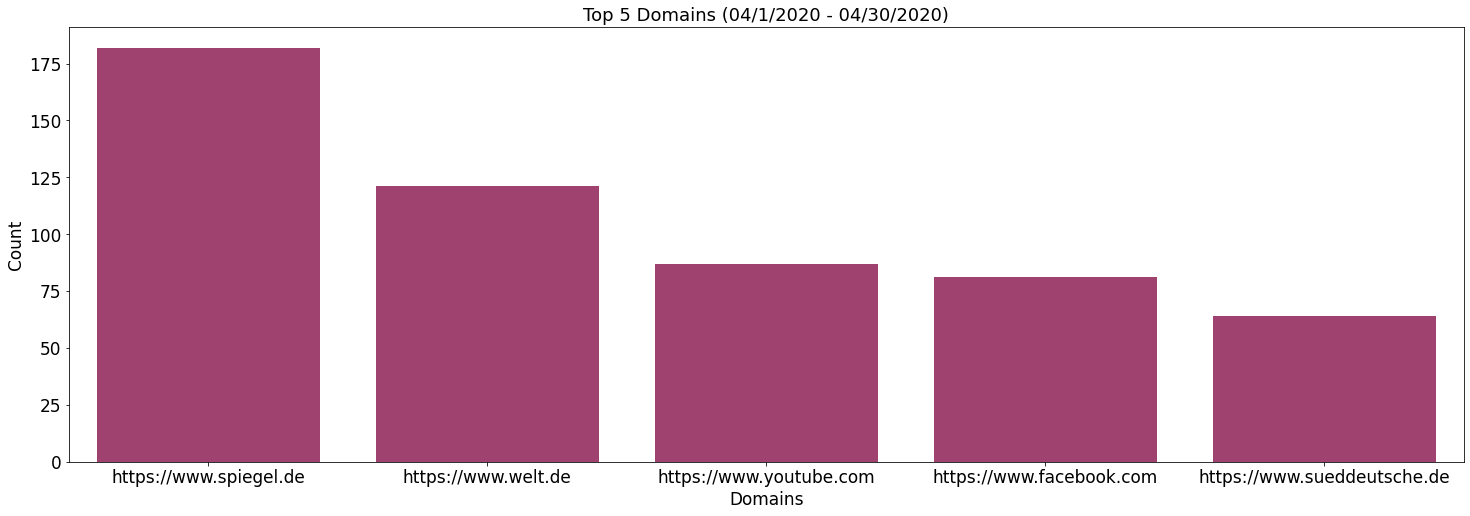

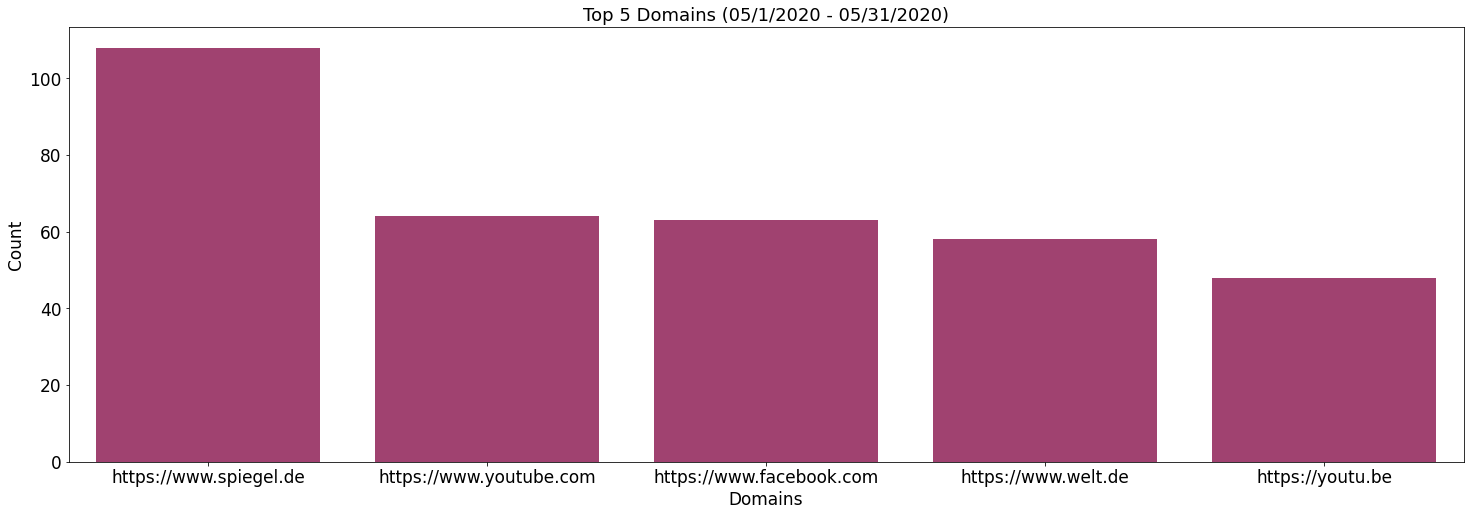

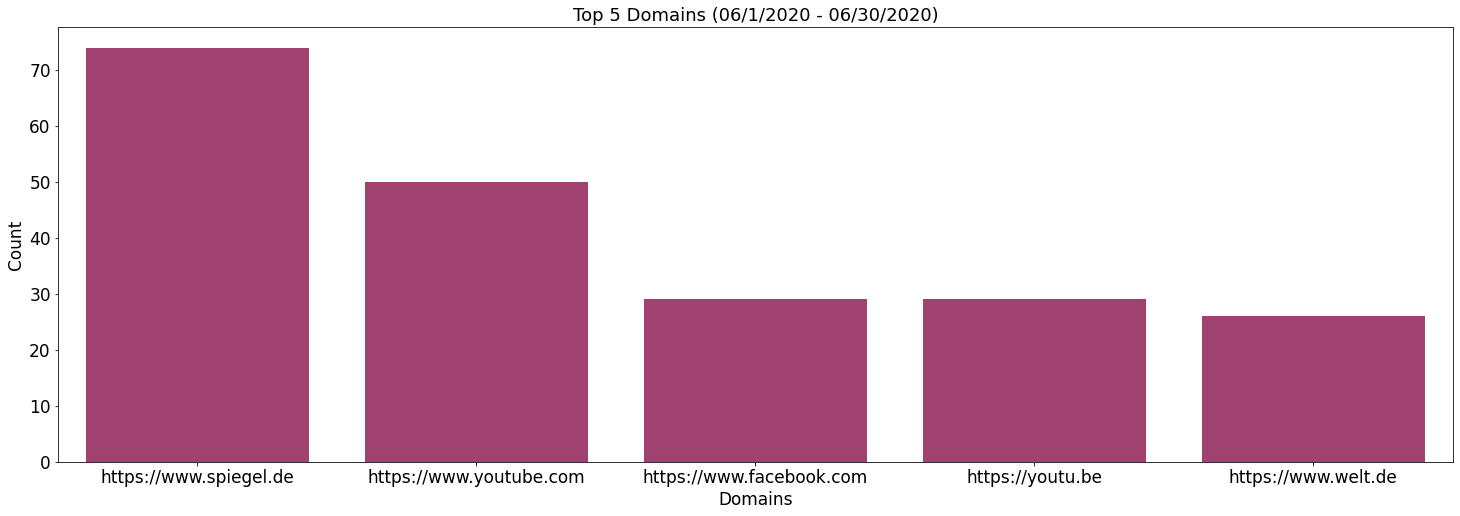

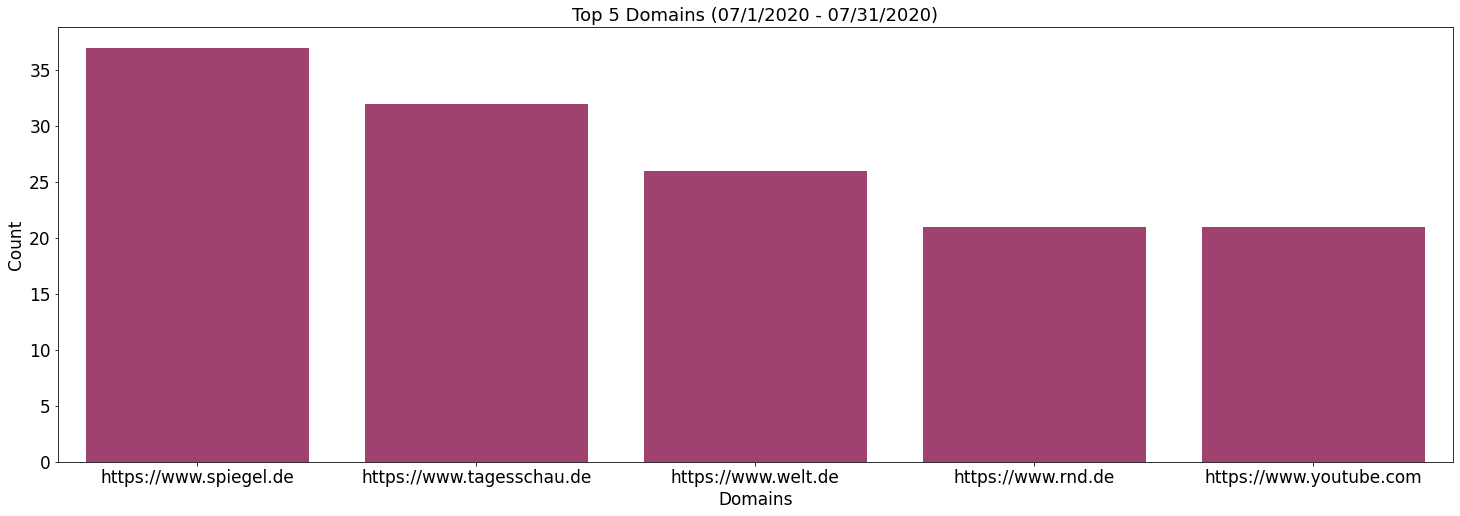

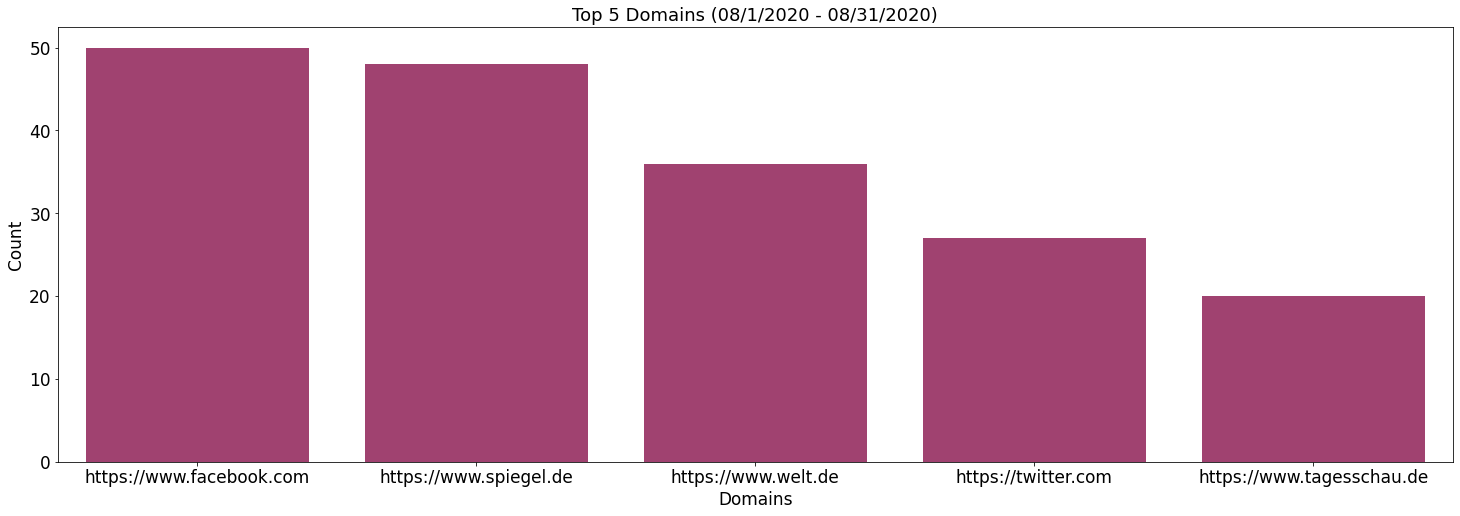

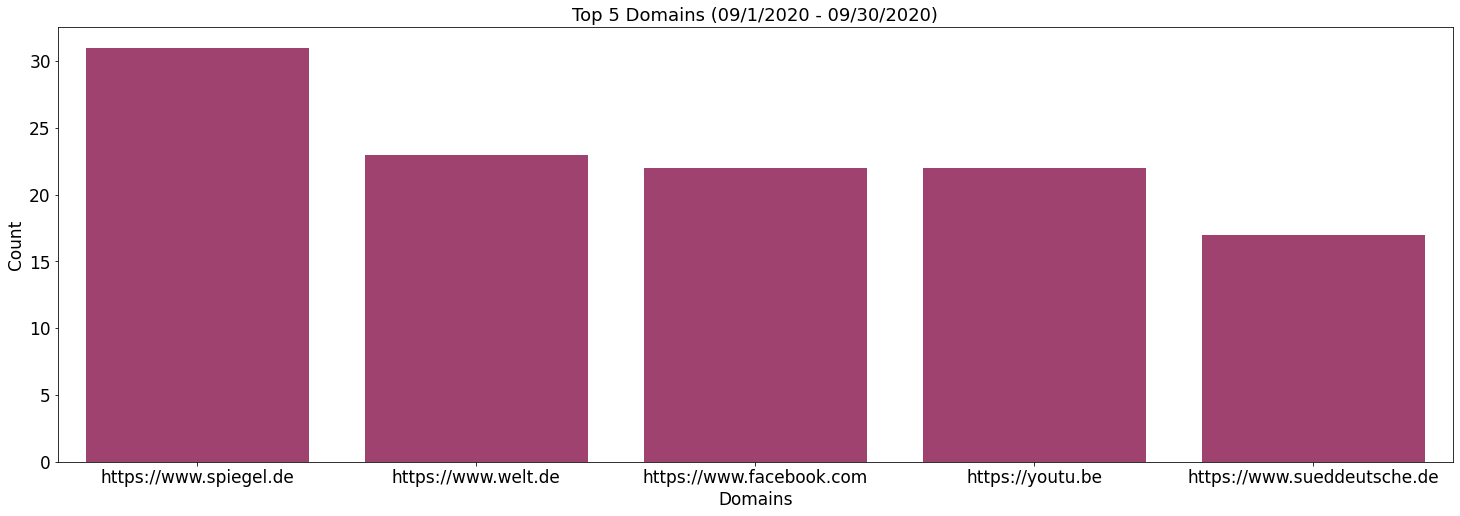

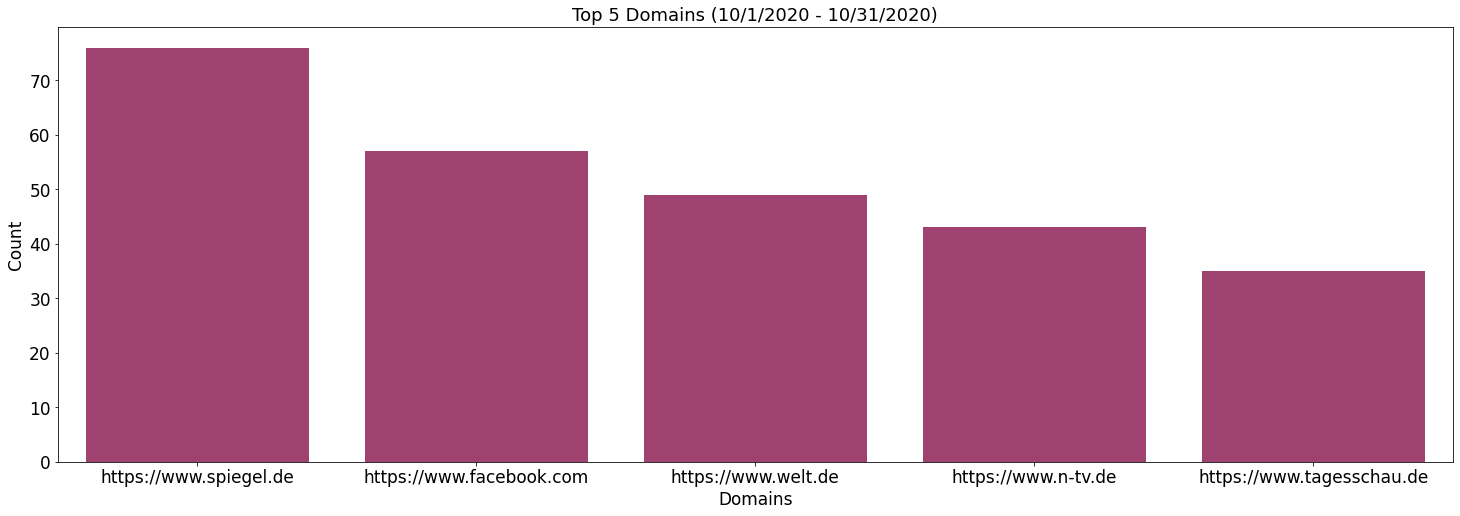

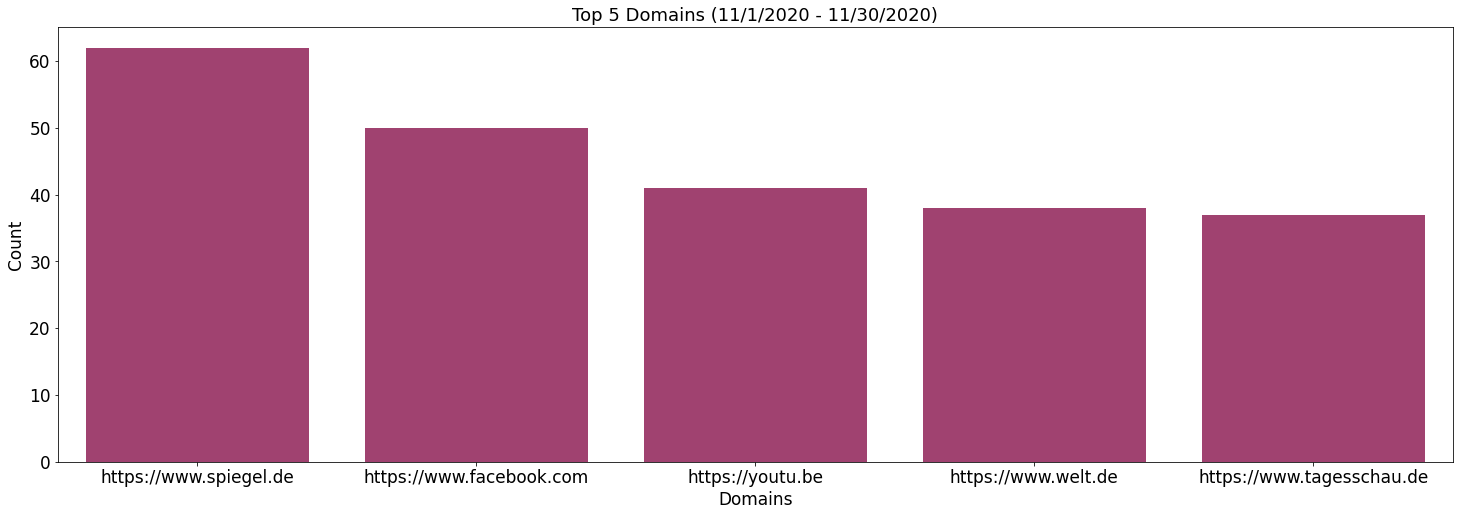

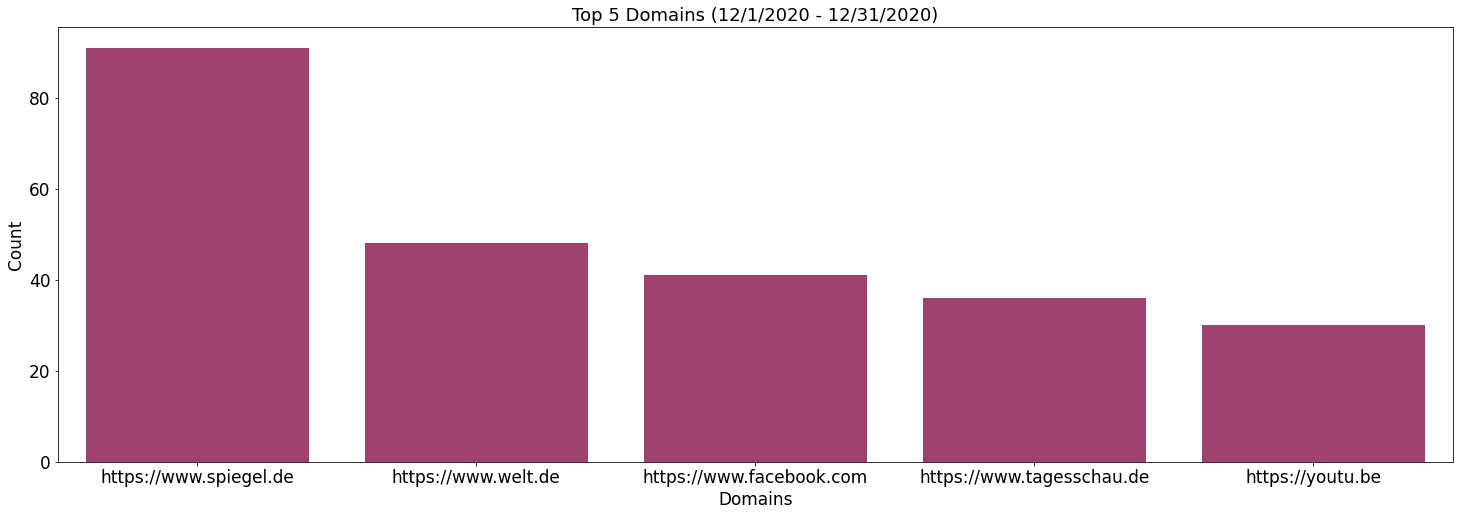

In [19]:
# Covid-Tweets: Domains Top 5 throughout the year

df_copy = df.copy()
df_copy = df_copy.drop(['id', 'party', 'screen_name', 'name'], axis = 'columns')
df_copy = filter_rows_by_values(df_copy, 'tweet_id', get_all_covid_tweet_ids(), True)
df_copy['date'] = pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_domains_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc= True))]
    df_top_domains = (df_domains_per_month['domain'].value_counts(sort=True, ascending=False)).head(number_of_top_domains)
    plot = get_plot(df_top_domains, dates)
    plt.show()


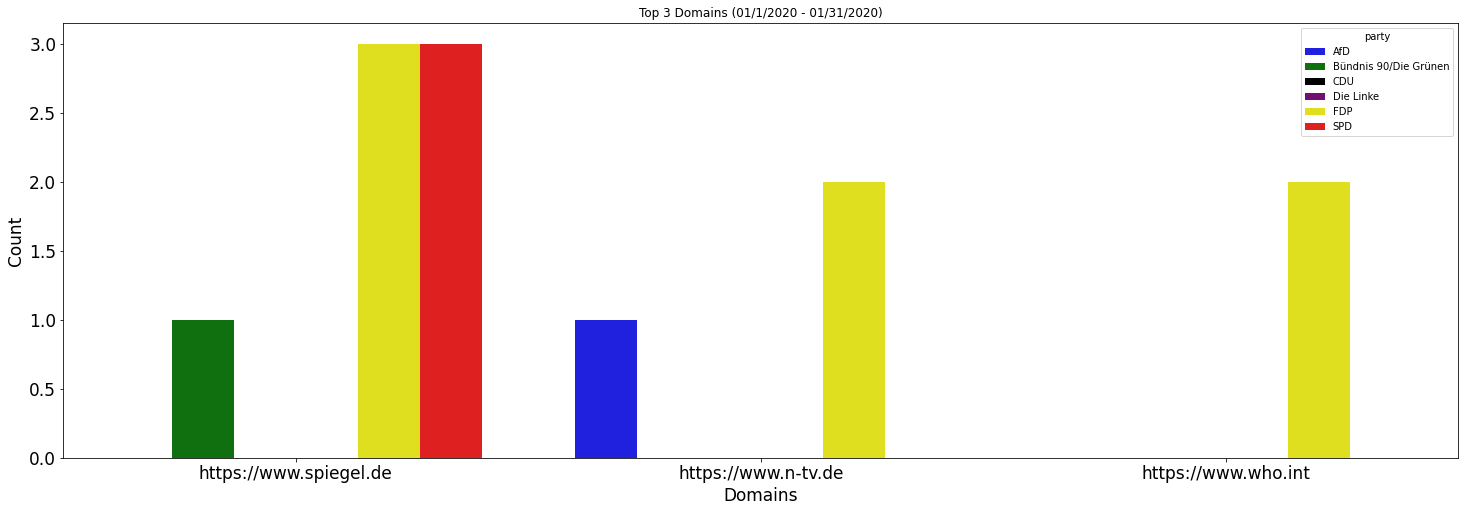

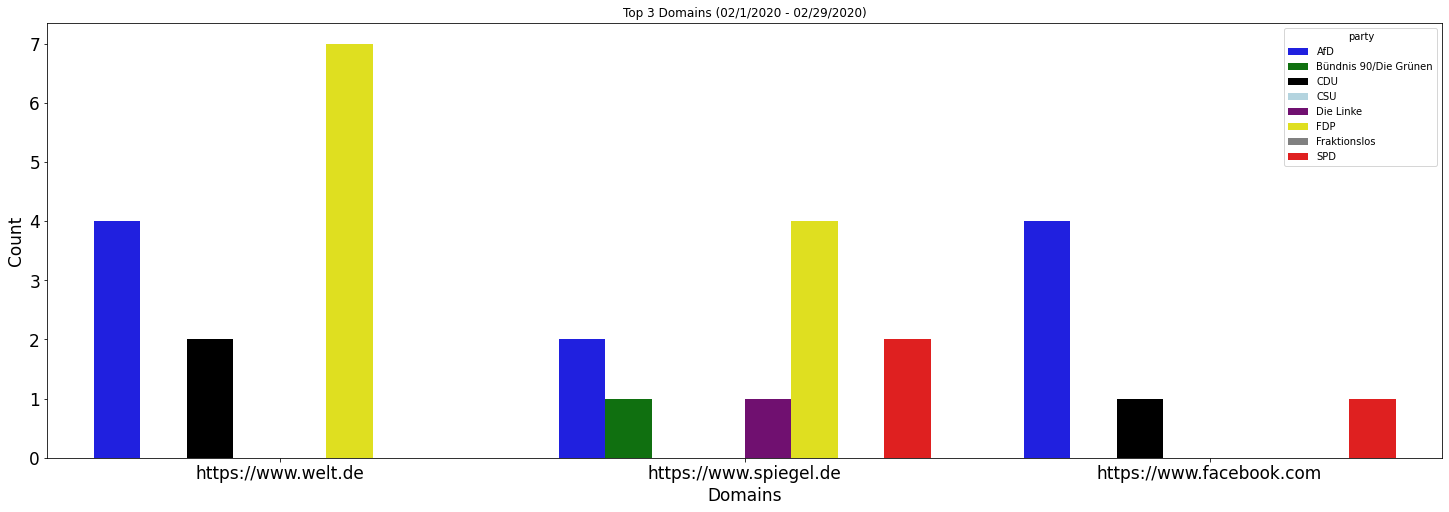

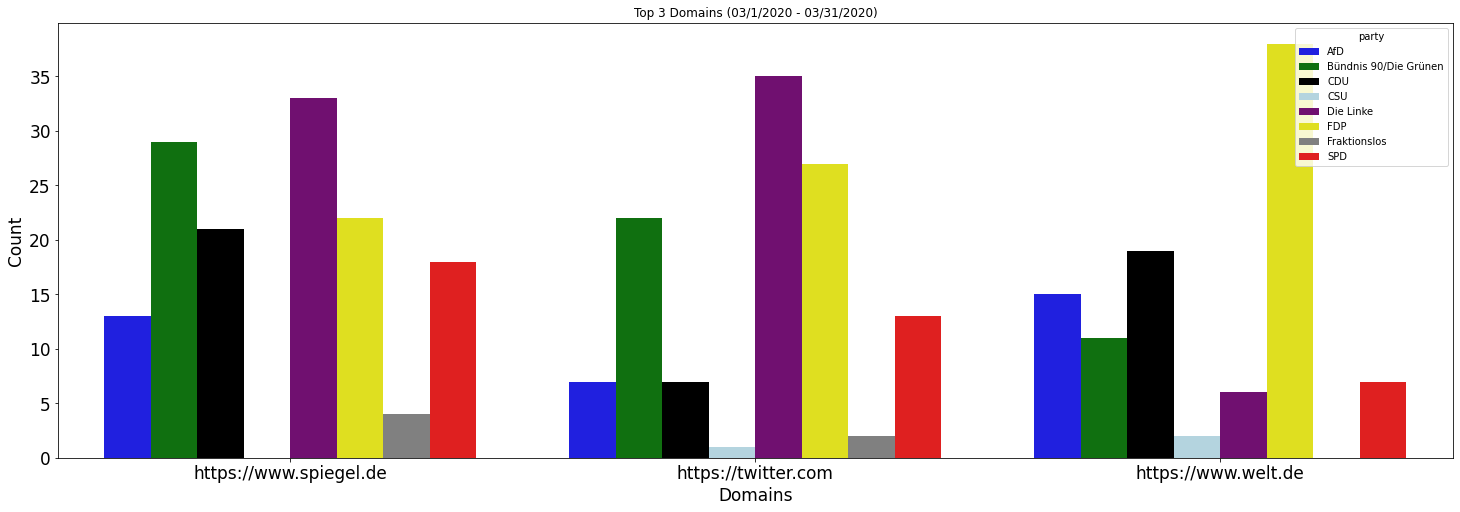

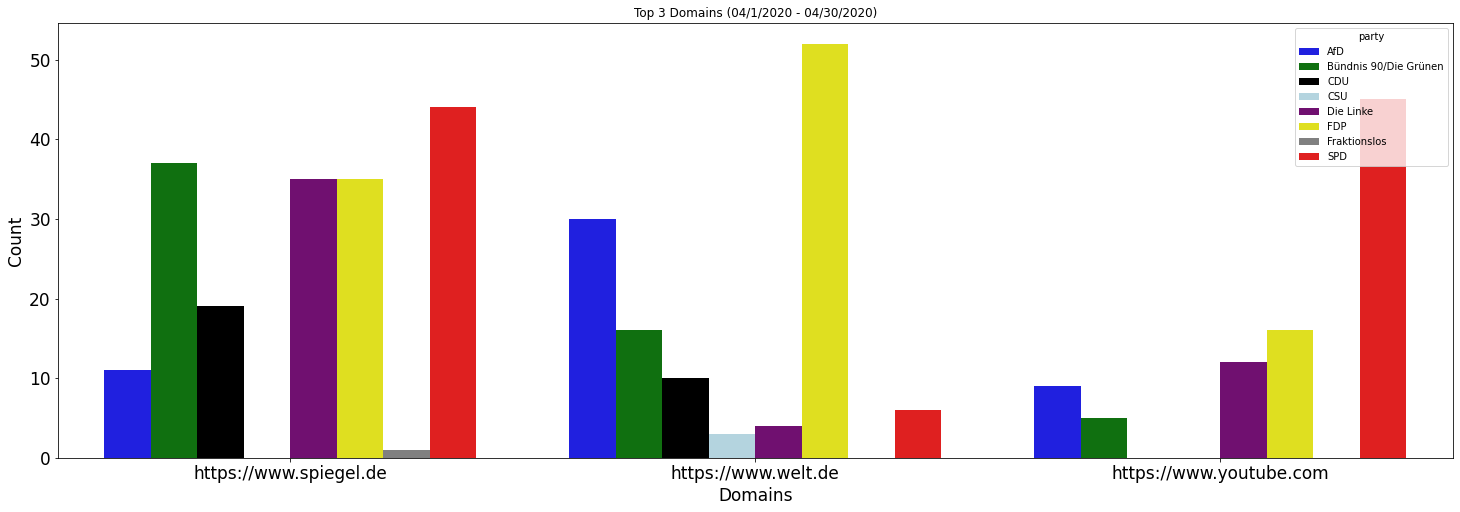

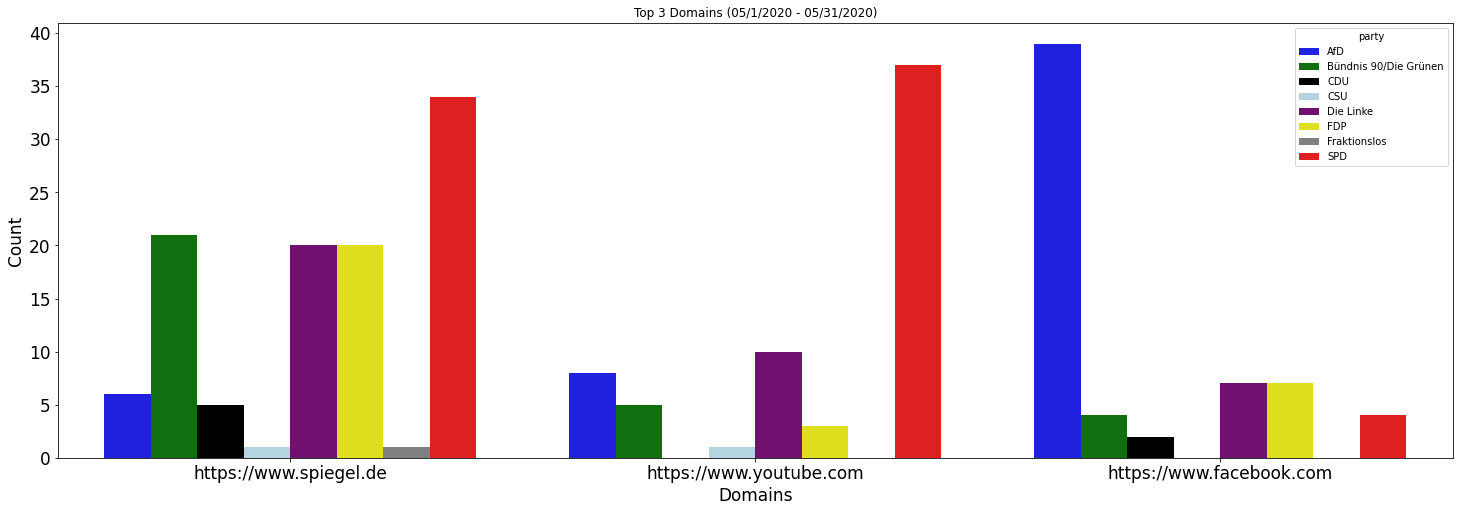

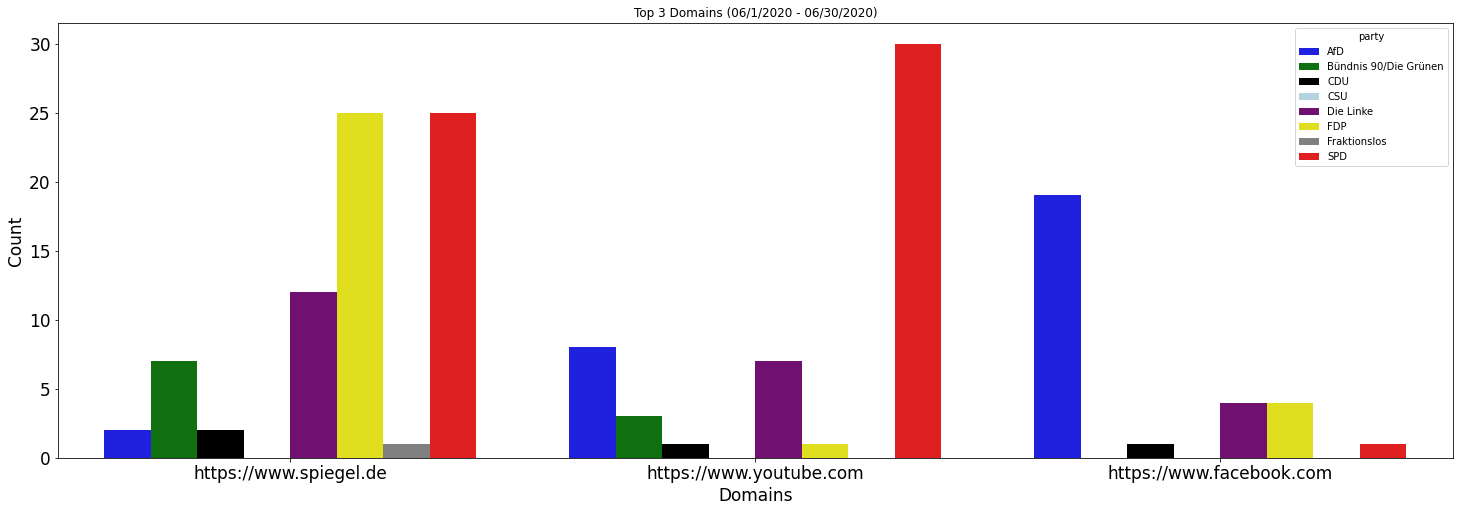

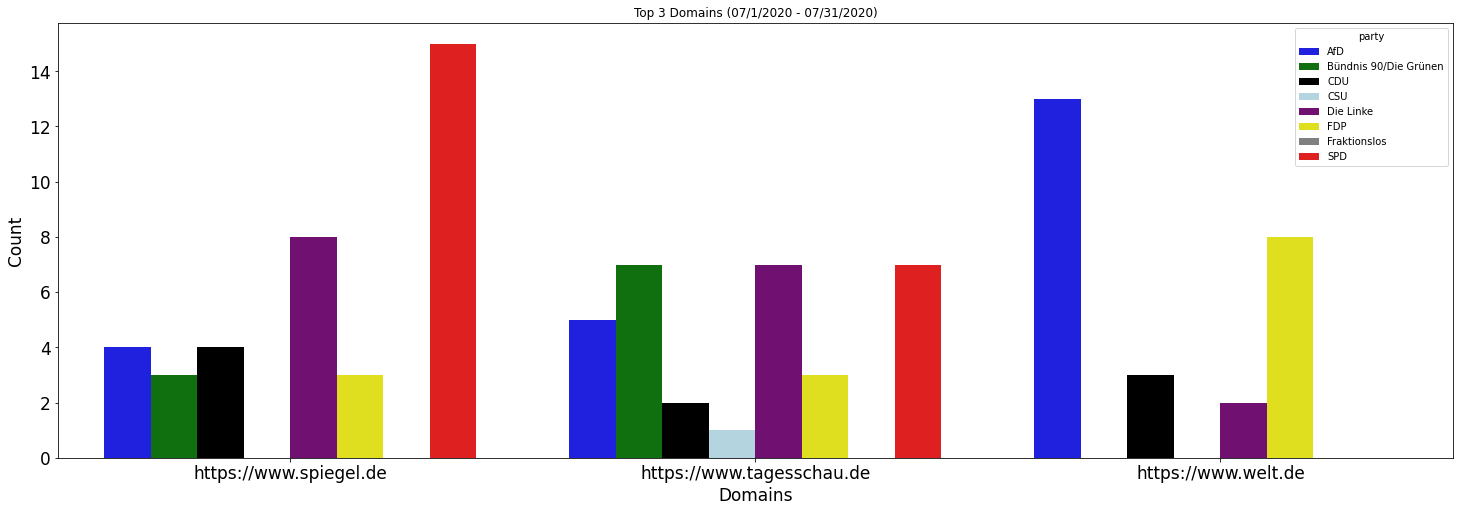

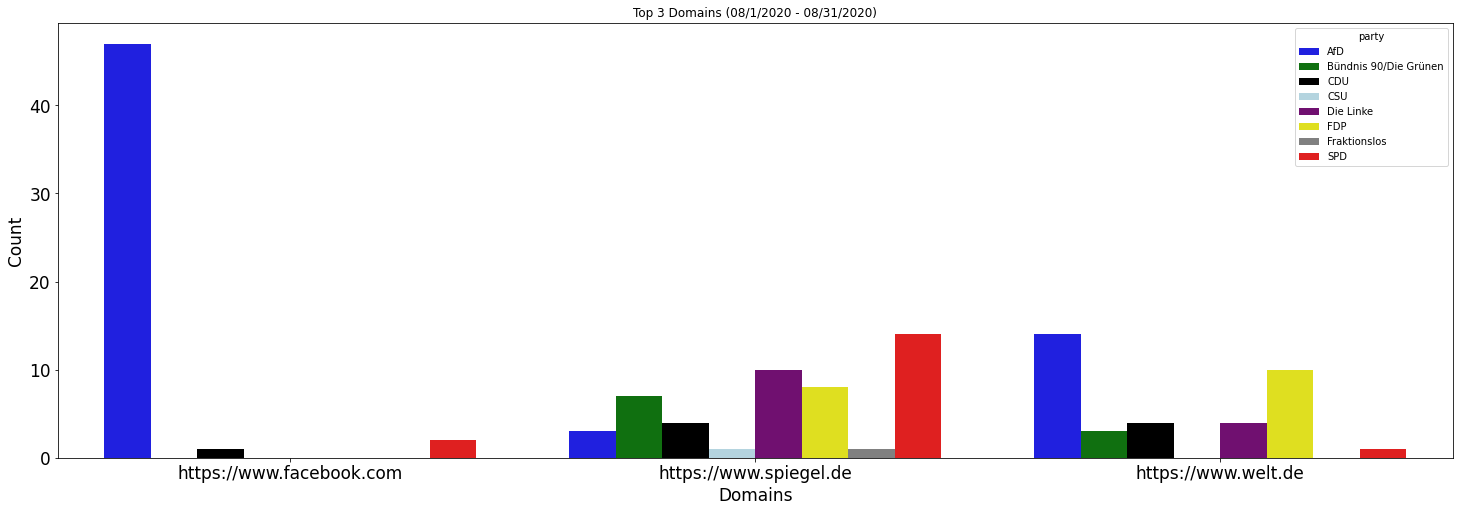

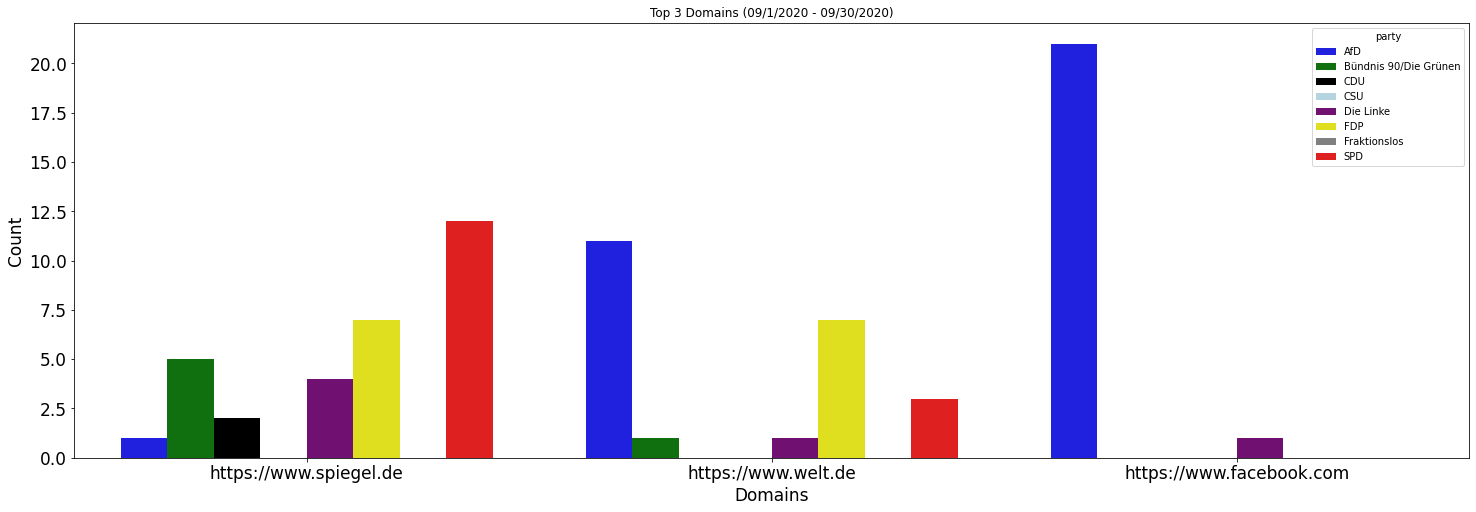

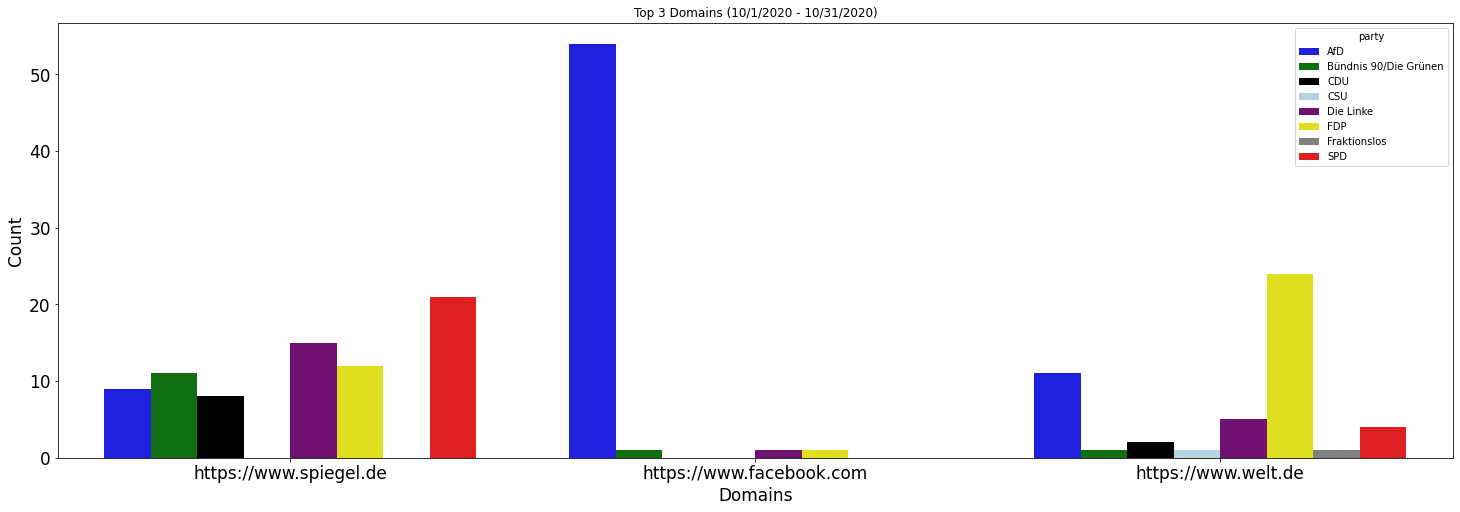

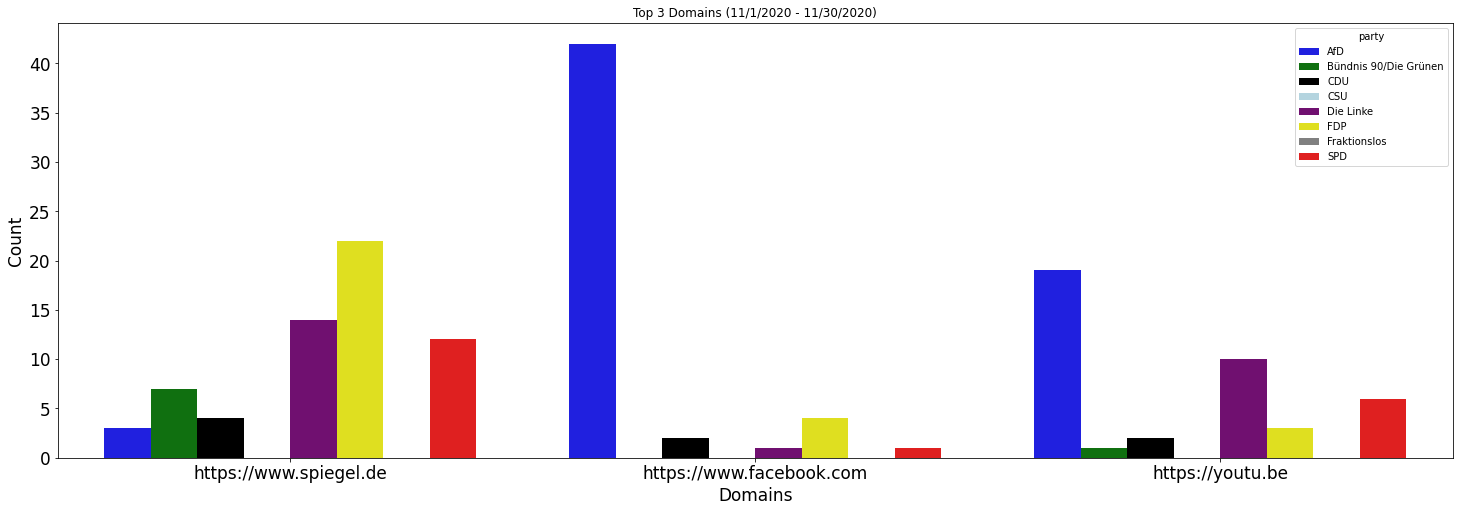

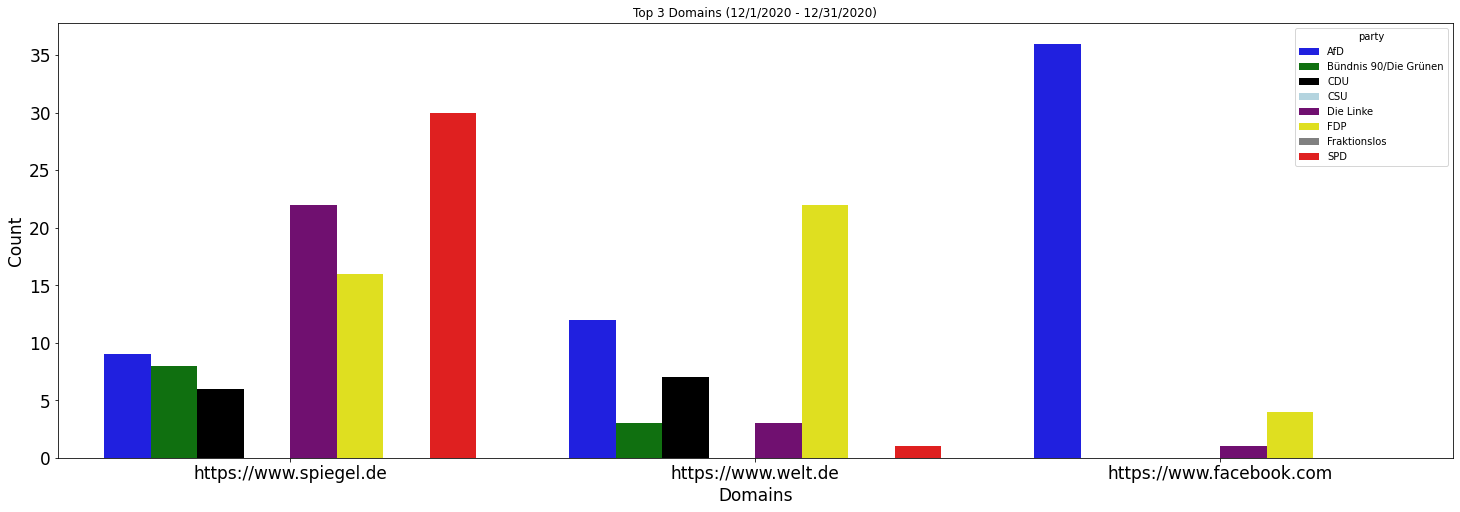

In [20]:
# Covid-Tweets: Top Domains used by party throughout the year

df_copy = df.copy()
df_copy = df_copy.drop(['id', 'screen_name', 'name'], axis='columns')
df_copy = filter_rows_by_values(df_copy, 'tweet_id', get_all_covid_tweet_ids(), True)
df_copy['date']=pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_domains_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc=True))]
    df_relevant_columns = df_domains_per_month.drop('date', axis='columns')
    top_domains = ((df_relevant_columns['domain'].value_counts(sort=True, ascending=False)).head(number_of_domains_per_party)).index.to_list()
    df_relevant_columns = df_relevant_columns.groupby(['party'])['domain'].value_counts(sort=True, ascending=False).unstack().fillna(0)
    df_top_domains = df_relevant_columns.filter(items=top_domains)
    df_top_domains = df_top_domains.rename_axis(None, axis=1)
    data_top_domains = df_top_domains.reset_index().melt(id_vars=['party'], value_vars=top_domains, var_name='domain', value_name='count')
    plot = get_plot_parties(data_top_domains, dates)
    plt.show()

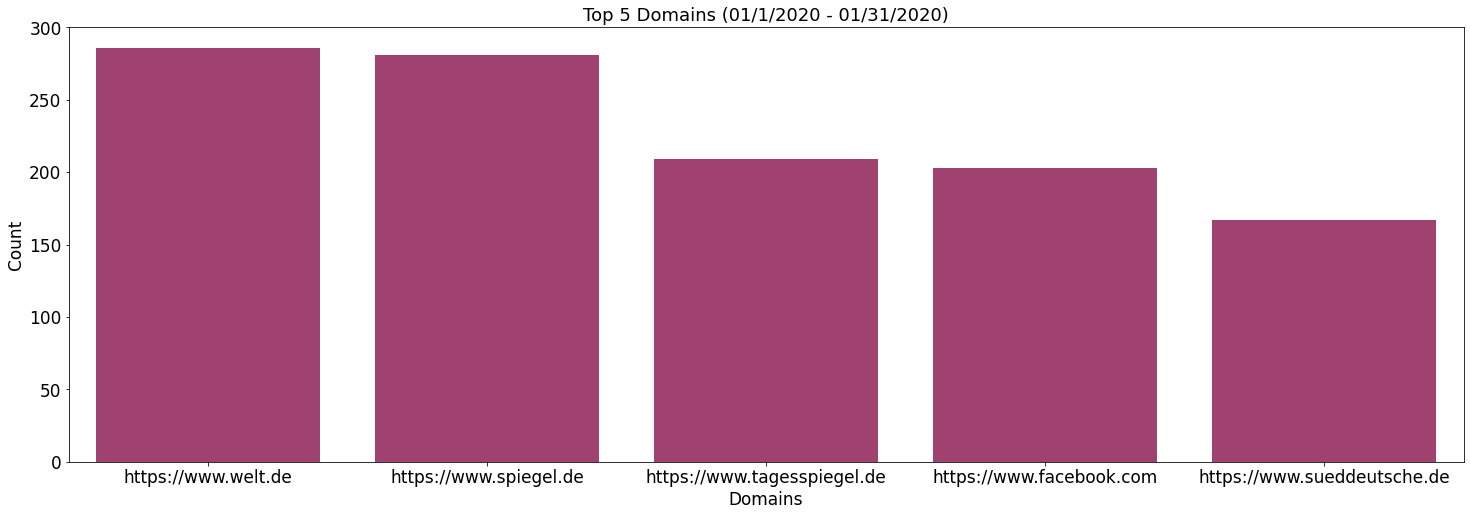

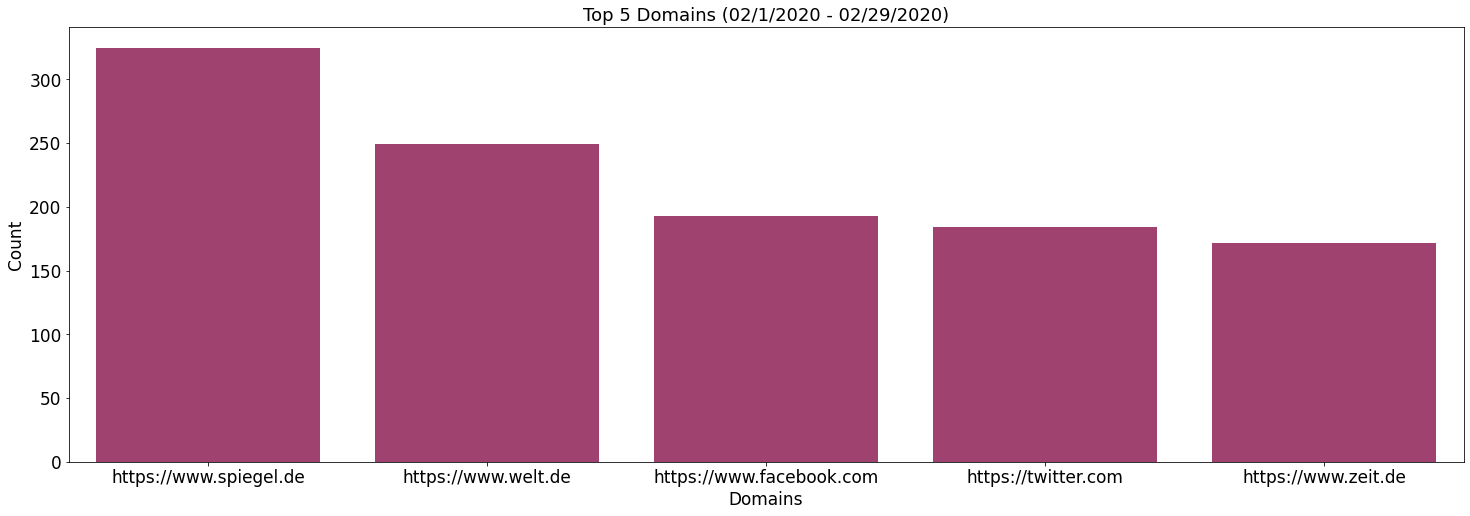

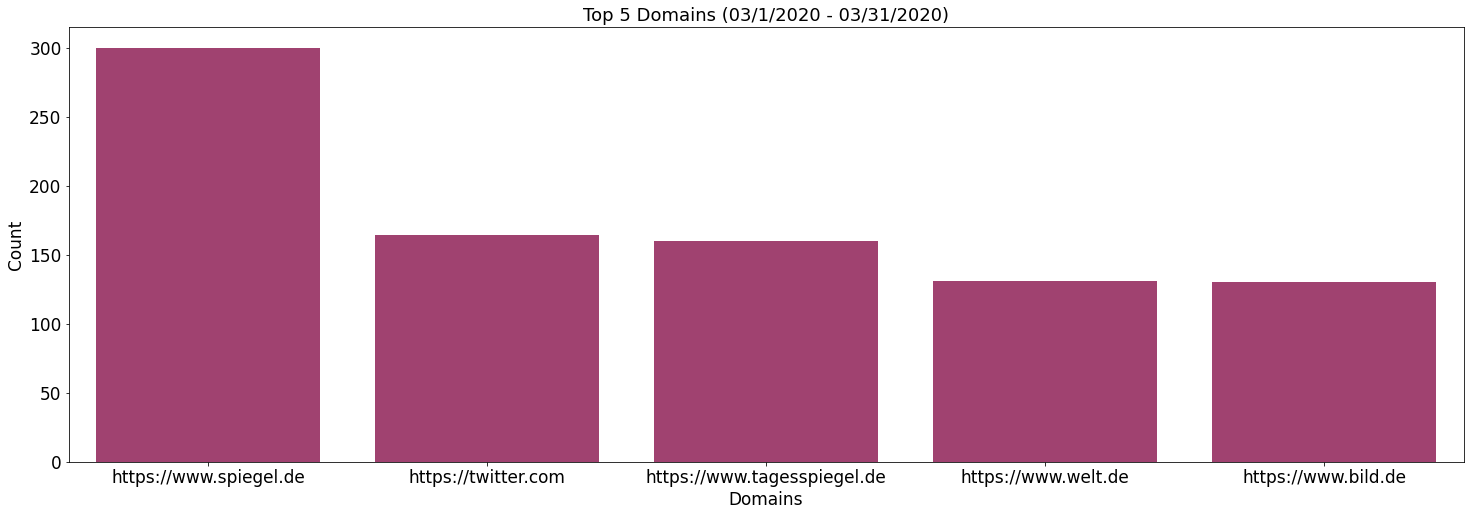

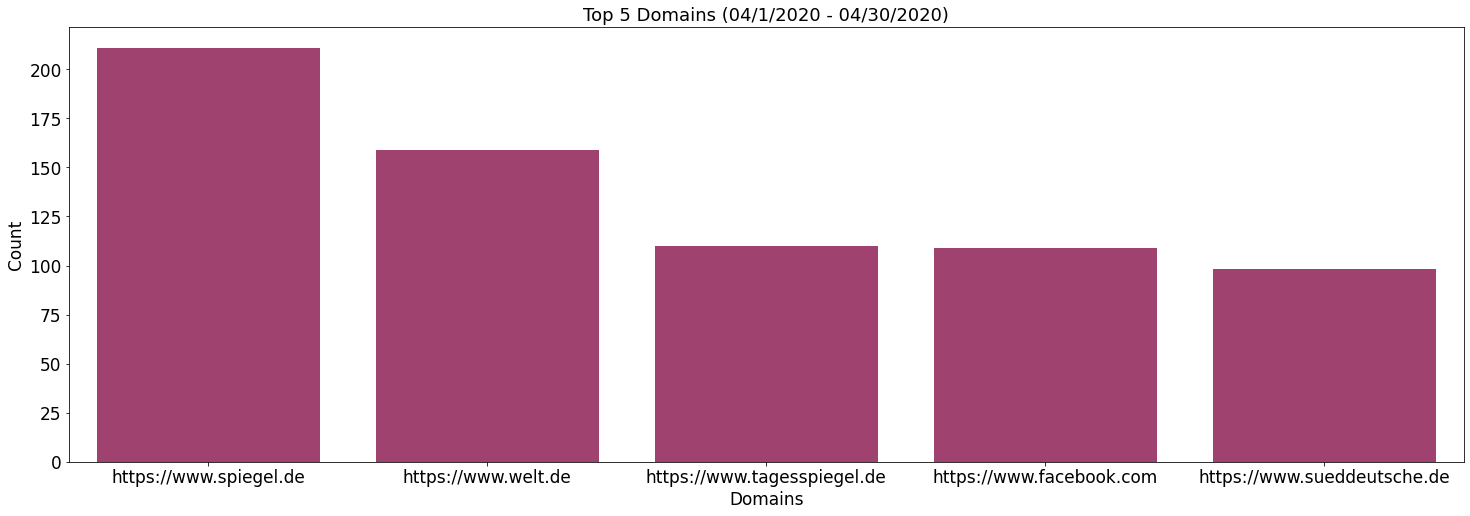

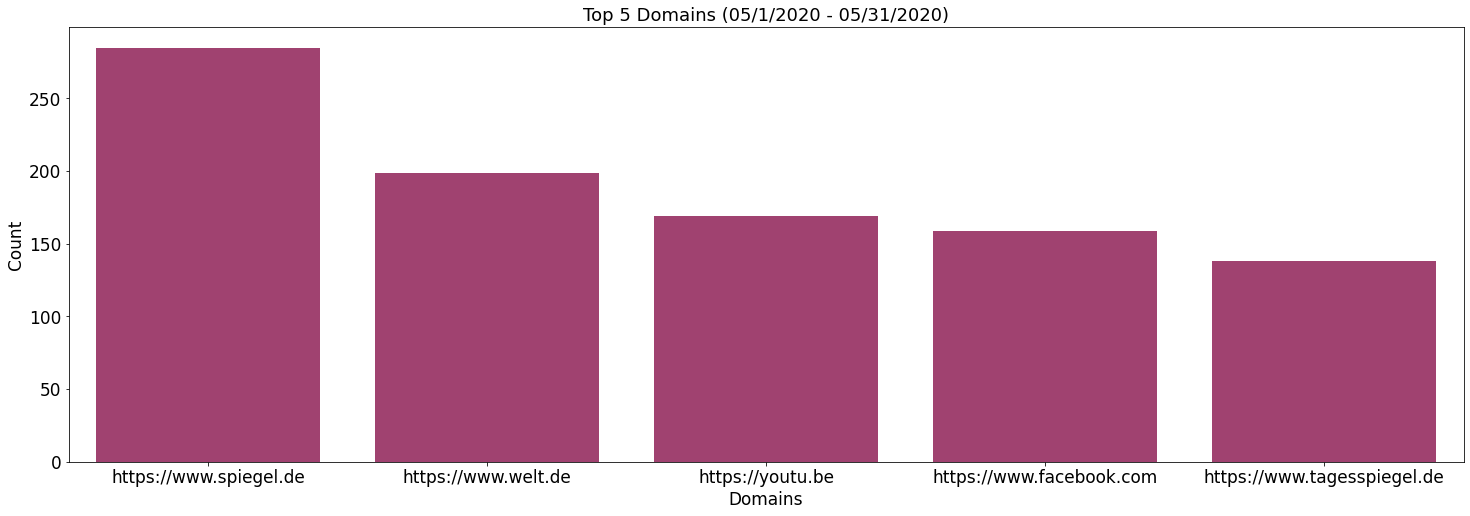

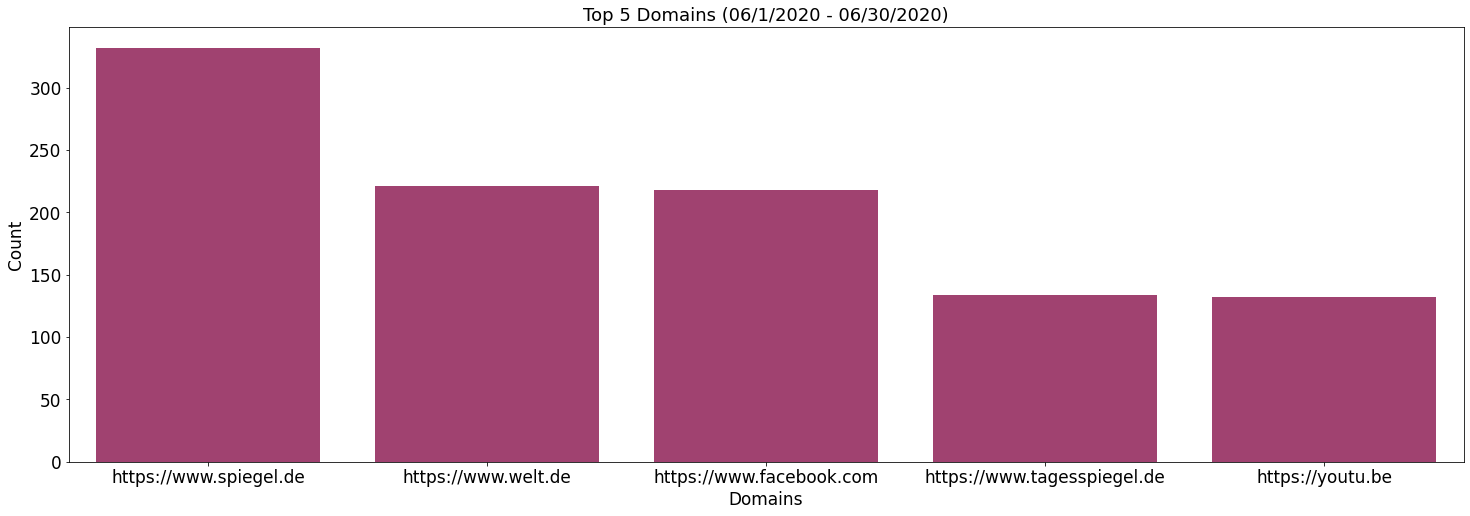

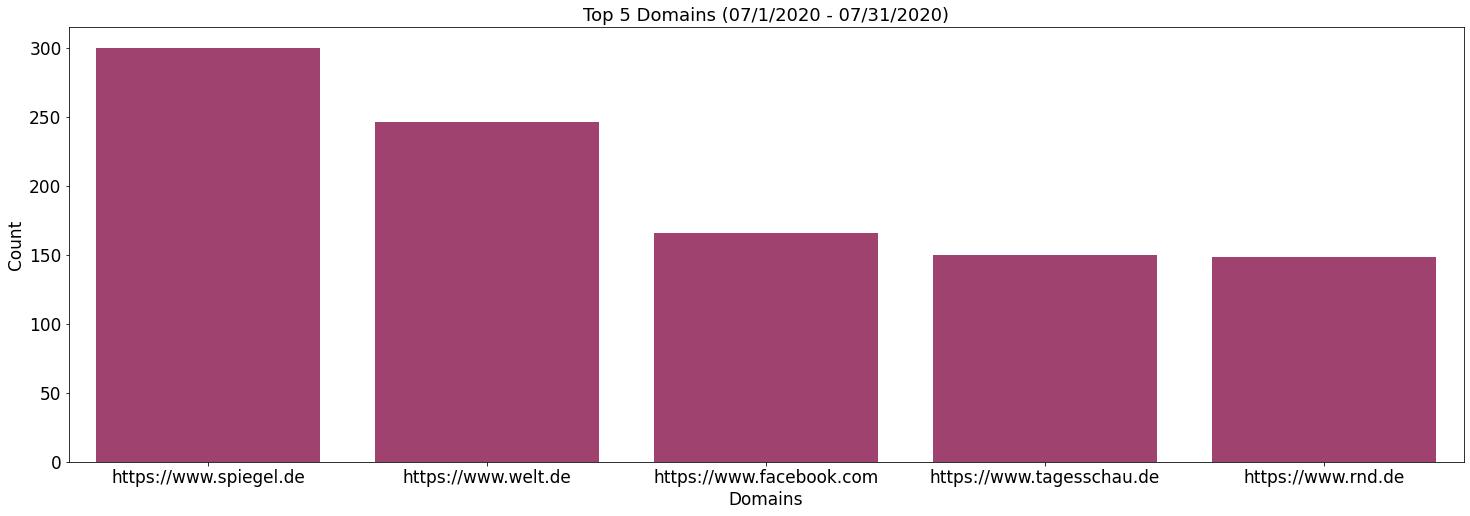

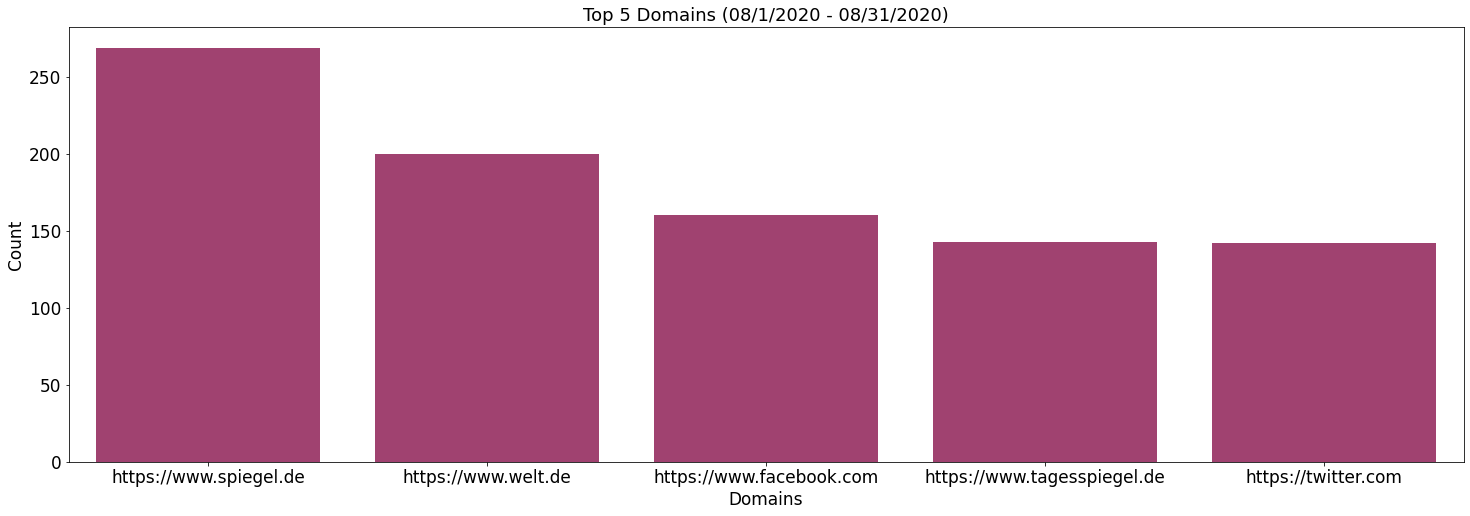

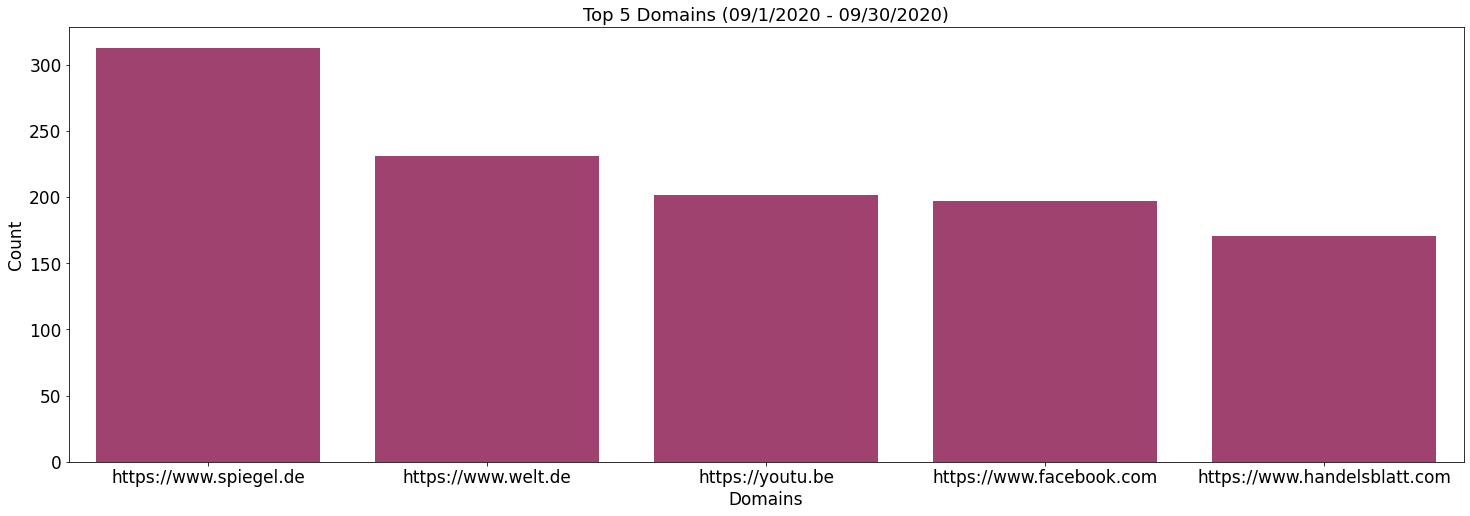

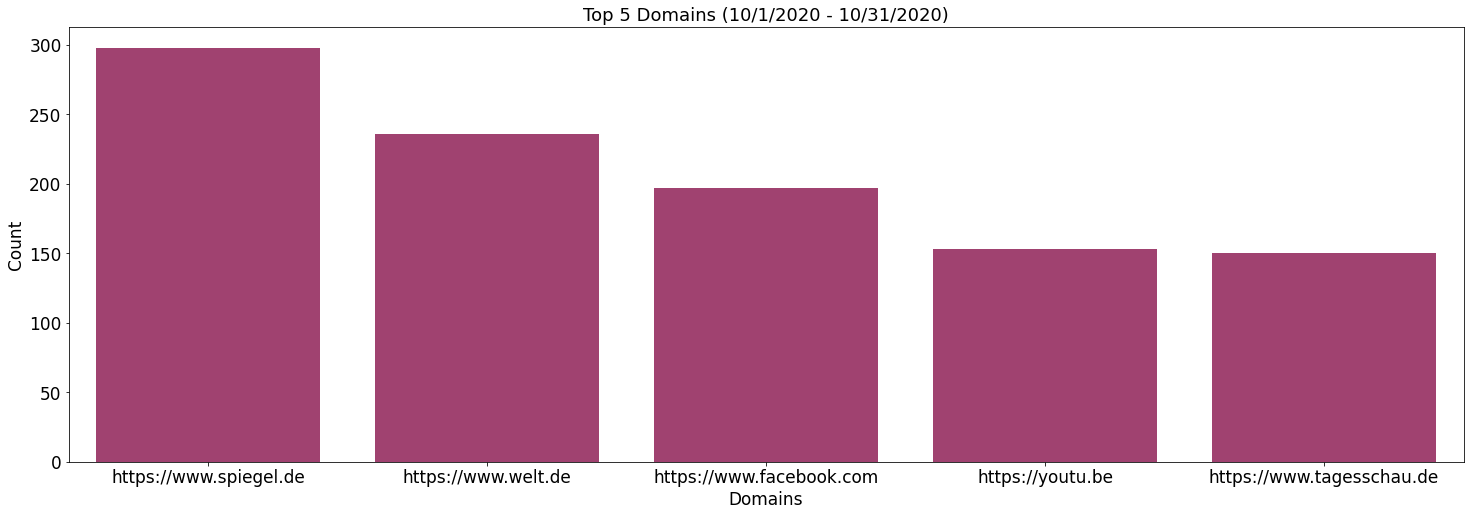

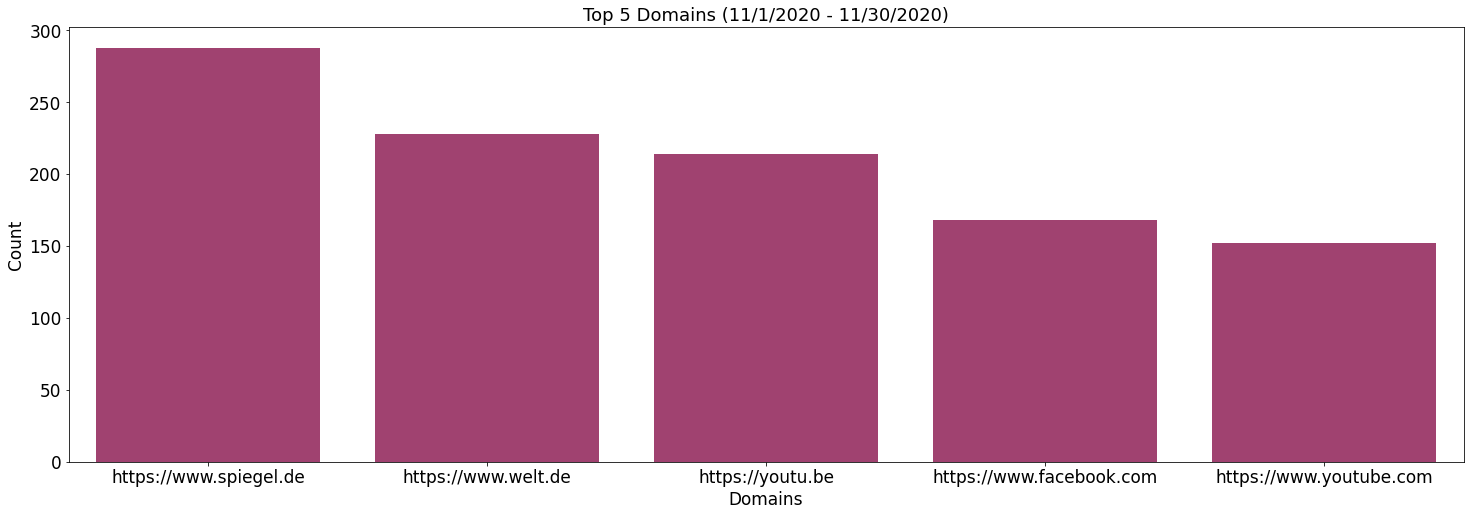

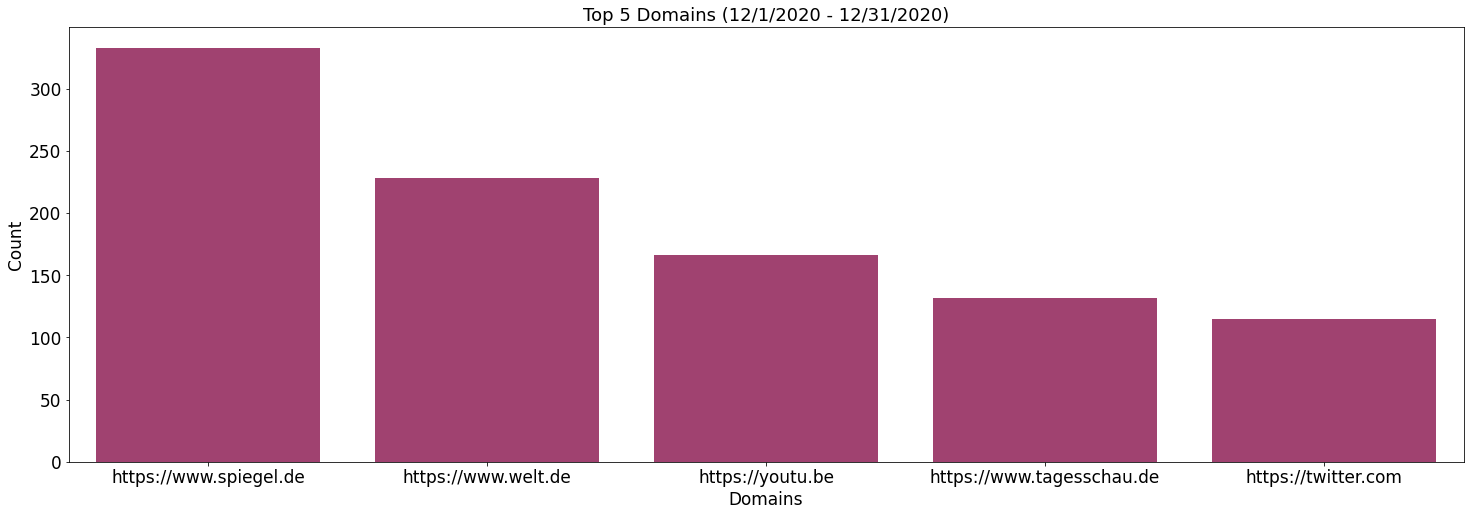

In [21]:
# Non-covid-Tweets: Domains Top 5 throughout the year

df_copy = df.copy()
df_copy = df_copy.drop(['id', 'party', 'screen_name', 'name'], axis = 'columns')
df_copy = filter_rows_by_values(df_copy, 'tweet_id', get_all_covid_tweet_ids(), False)
df_copy['date'] = pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_domains_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc= True))]
    df_top_domains = (df_domains_per_month['domain'].value_counts(sort=True, ascending=False)).head(number_of_top_domains)
    plot = get_plot(df_top_domains, dates)
    plt.show()

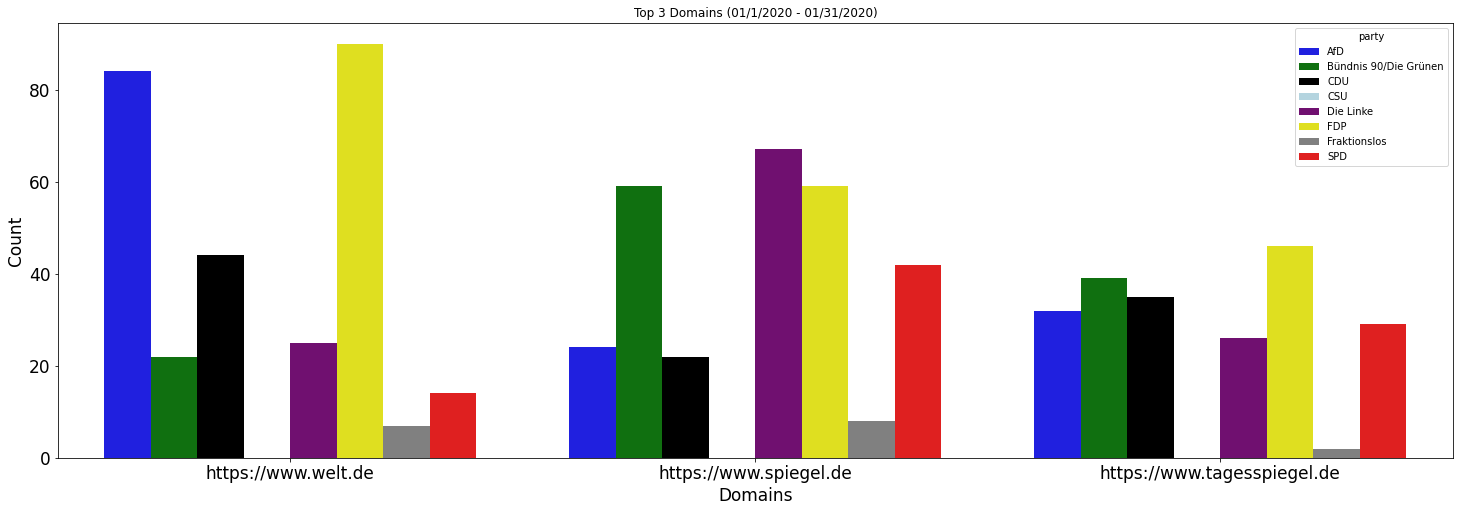

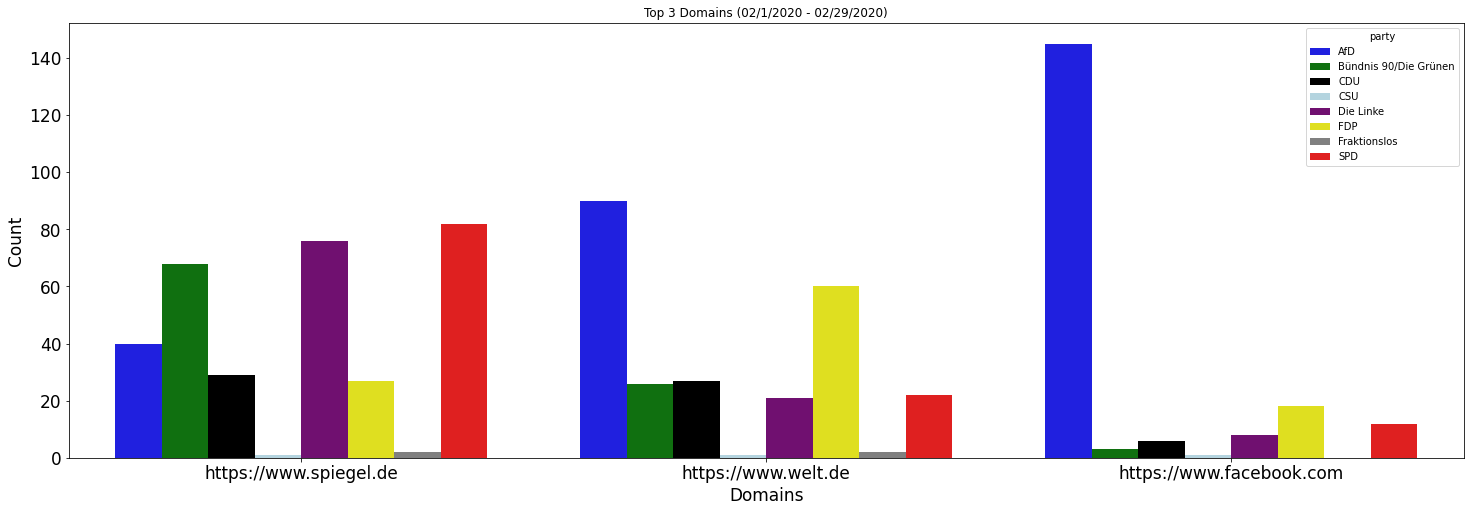

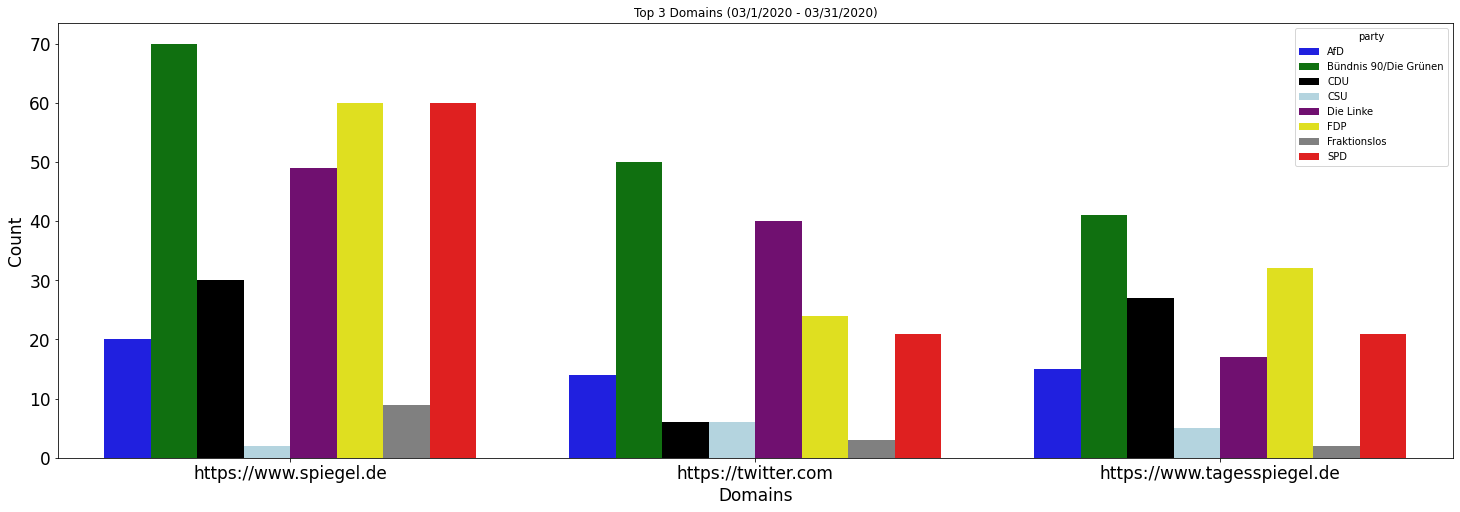

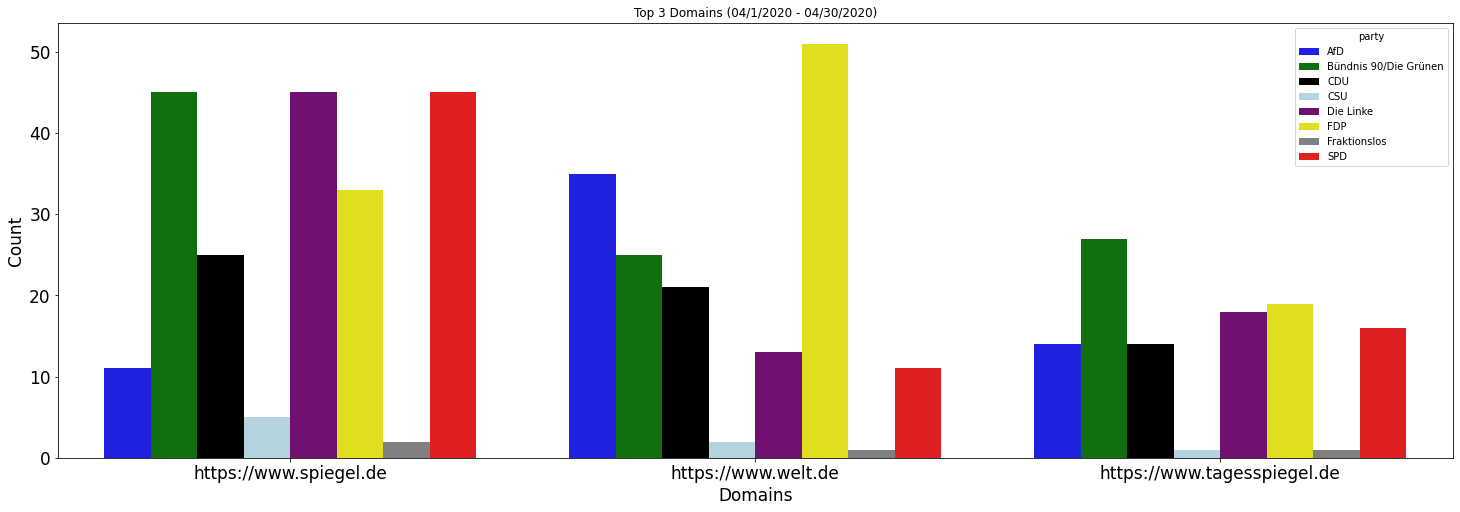

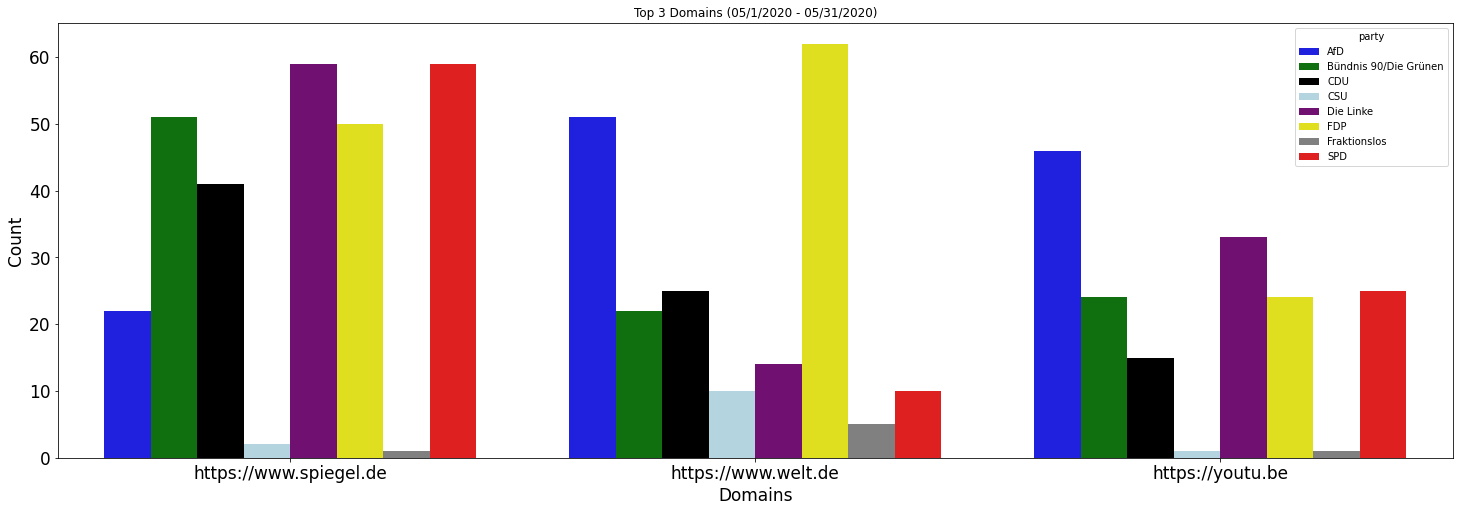

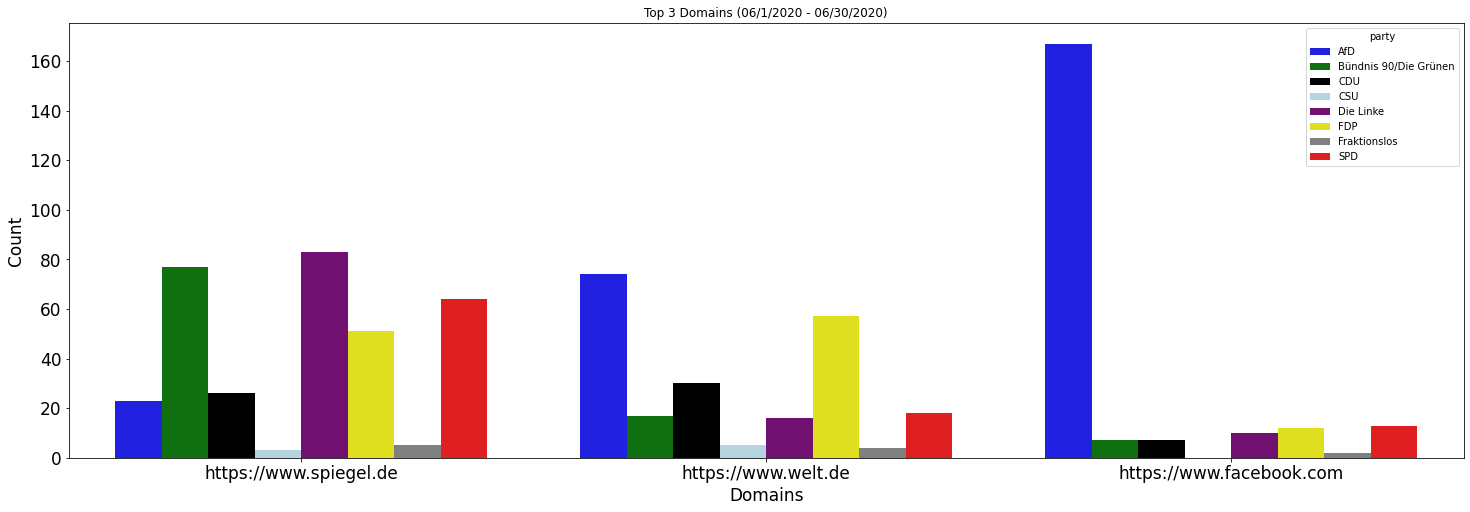

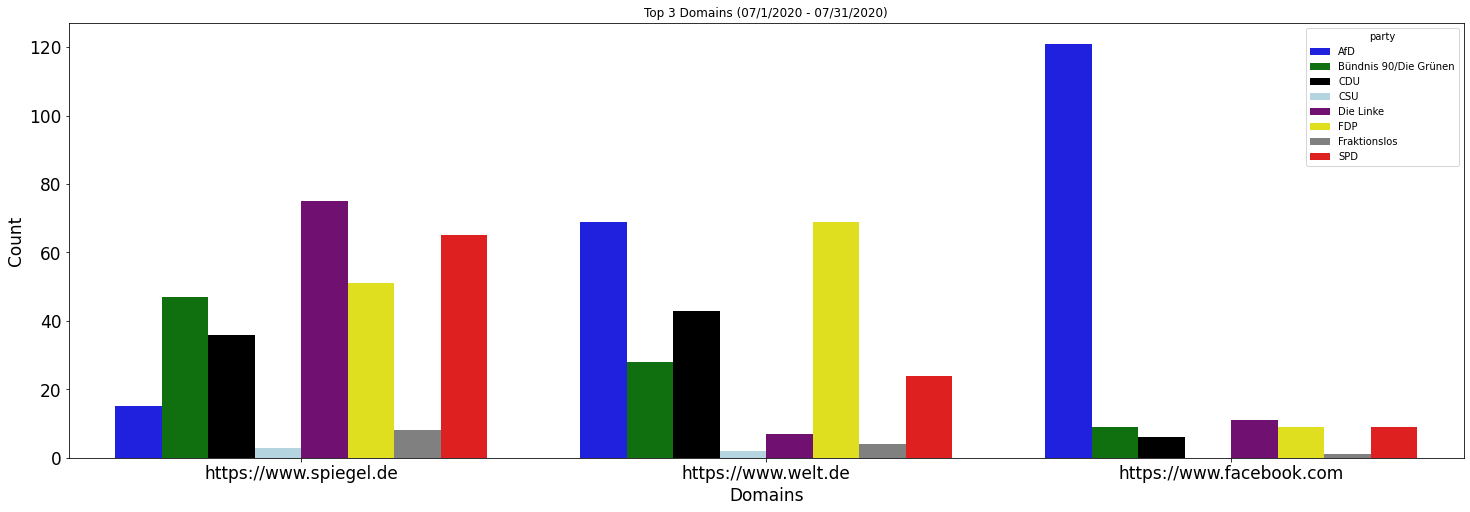

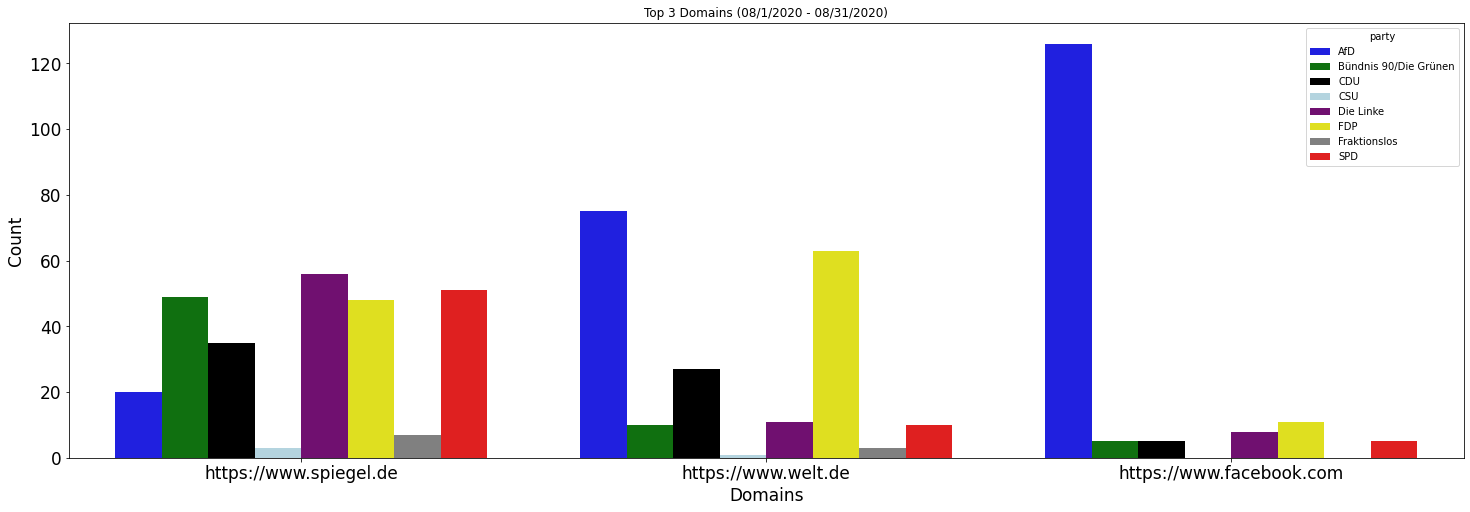

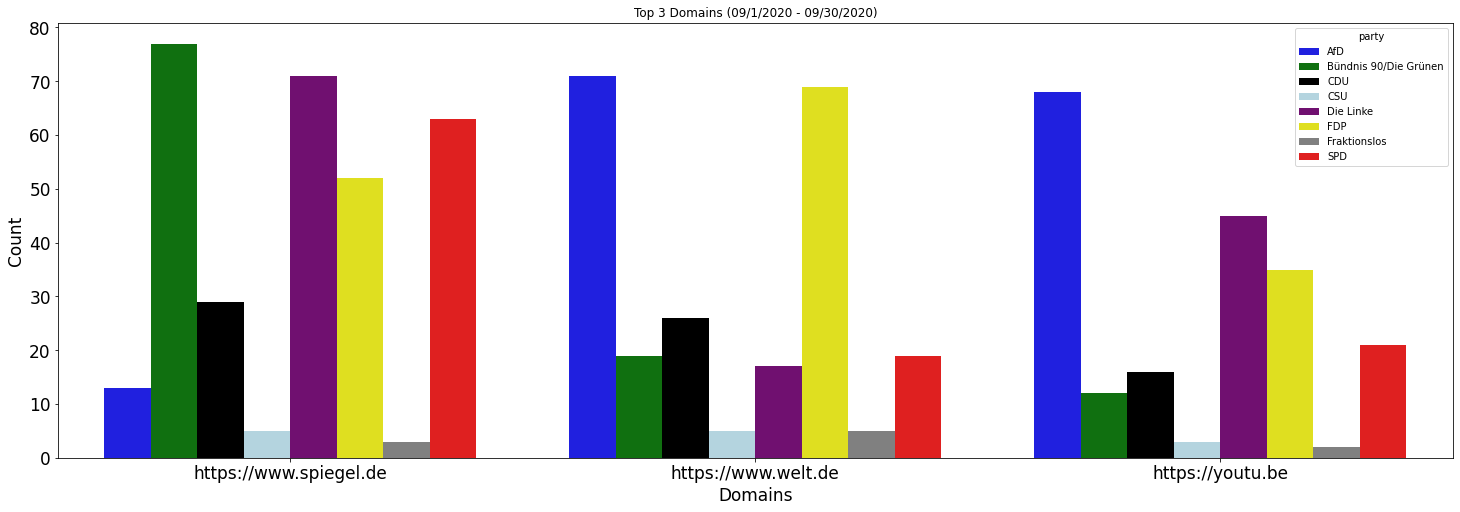

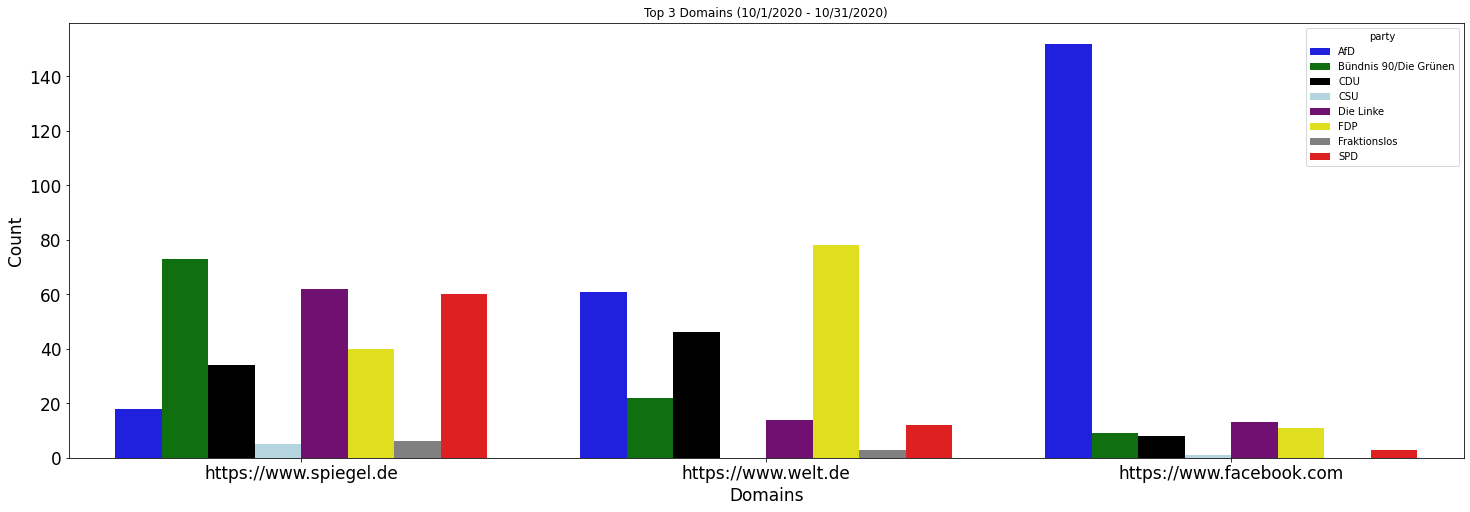

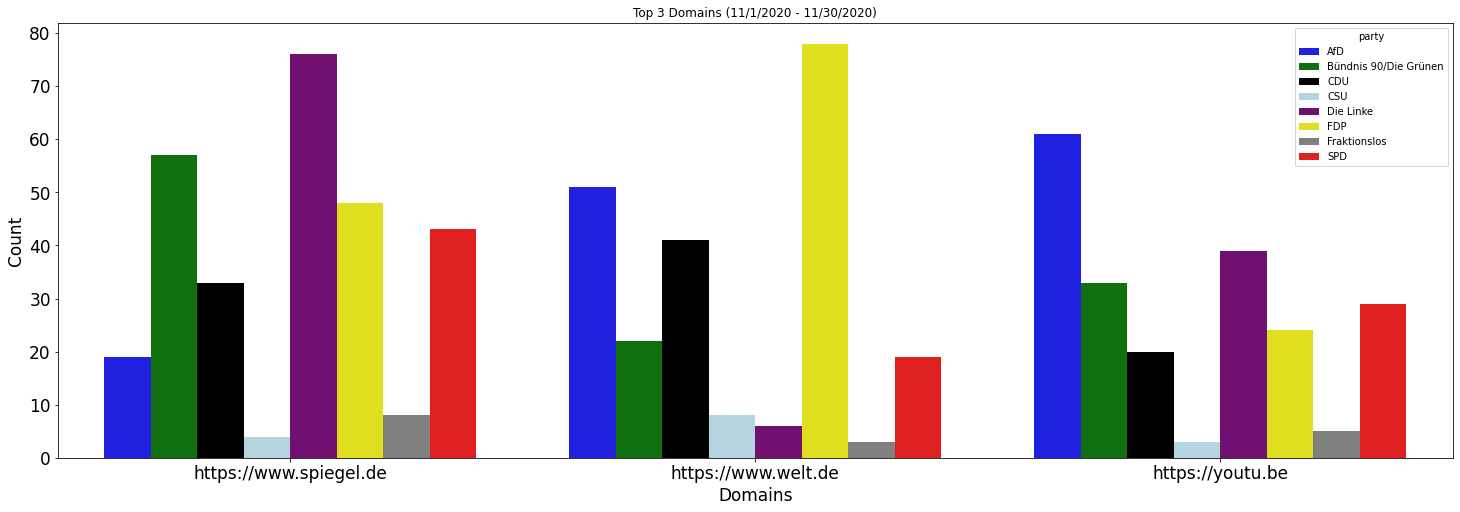

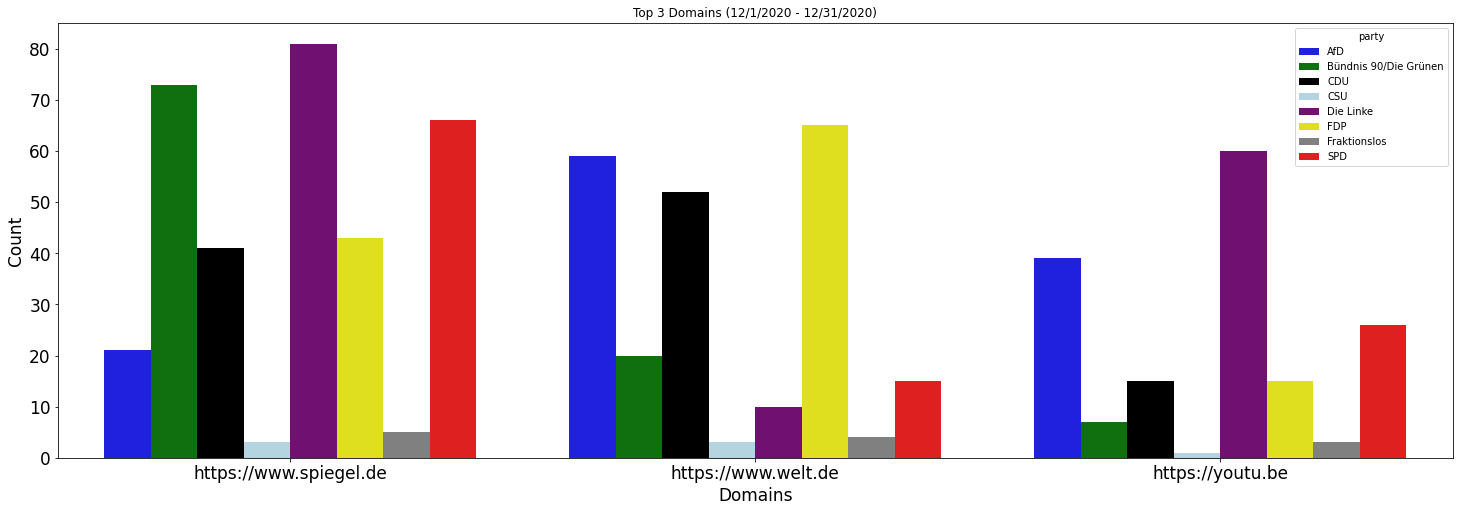

In [22]:
# Non-Covid-Tweets: Top Domains used by party throughout the year

df_copy = df.copy()
df_copy = df_copy.drop(['id', 'screen_name', 'name'], axis='columns')
df_copy = filter_rows_by_values(df_copy, 'tweet_id', get_all_covid_tweet_ids(), False)
df_copy['date']=pd.to_datetime(df_copy['date'], utc= True).dt.date
for dates in start_end_date:
    df_domains_per_month = df_copy.loc[(df_copy['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_copy['date'] <= pd.to_datetime(dates[1], utc=True))]
    df_relevant_columns = df_domains_per_month.drop('date', axis='columns')
    top_domains = ((df_relevant_columns['domain'].value_counts(sort=True, ascending=False)).head(number_of_domains_per_party)).index.to_list()
    df_relevant_columns = df_relevant_columns.groupby(['party'])['domain'].value_counts(sort=True, ascending=False).unstack().fillna(0)
    df_top_domains = df_relevant_columns.filter(items=top_domains)
    df_top_domains = df_top_domains.rename_axis(None, axis=1)
    data_top_domains = df_top_domains.reset_index().melt(id_vars=['party'], value_vars=top_domains, var_name='domain', value_name='count')
    plot = get_plot_parties(data_top_domains, dates)
    plt.show()